# Resubmission
* Business Understanding
    * Update explanation of what values we are measuring
* Joint Attributes
    * Matrix Plot
        * Update Column Names
        * Transform values on log scale
    * Include pairwise plots to help learn about our categorical variables
        * Determine what features are highly correlated to AV Installed and Enabled Variable
        * AV Build Correlation Plot

# DS 7331 Data Mining
### An Introduction To Data Mining And Related Topics
### Lab 1
* Tahir Ahmad<br>
* Christopher Ballenger<br>
* Grant Bourzikas<br>
* Vitaly Briker<br>

### Introduction and Business Understanding

If we look back at the last 15-20 years, Cybersecurity has become a very important topic across every person in the world regardless of their age and every business.  This point is illustrated by two growth factor- Market Capital and Jobs. The capital market has more than doubled in spend in the US since 2010 and it will triple from 2019 until 2022 reaching to a total market capital of 180 billion.  Additionally, because of the growth, there is a need for cybersecurity professionals.  The job market is exrtonaray hot because the number of jobs has doubled since 2010 and there will be a total of 6 million jobs in 2019 with a 2 million gap in open positions, or what the industry calls the talent shortage. This appears to reflect a healthy growth market and the cybersecurity industry is booming.

| Spend in Cybersecurity | Demand for Security Professionals | Breaches Over Years
| --- | --- | --- |
| 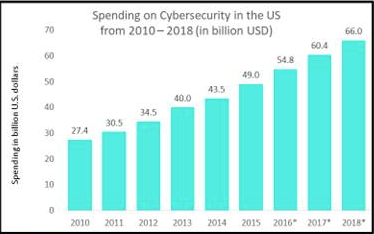 | 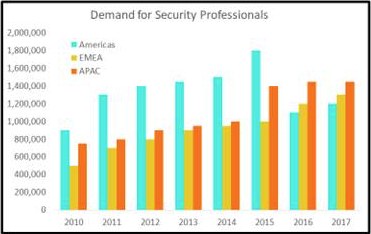 | 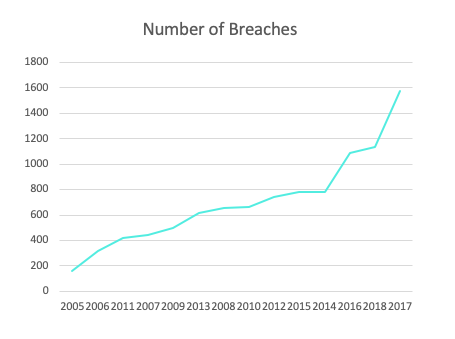 |
| Source: Statista 2019|Source: Frost and Sullivan | Source: Identity Threat Resource Center |  

However, the reality of cybersecurity is that since 2005, the world has seen a growth in the number of annual breaches in companies by 9x. We have seen OPM, JP Morgan, Anthem, Sony, Equifax, Home Depot, Adult Friend Finder, Yahoo!, Target and recently Marriott was just breached resulting in a compromise of 500 million records. While the world has spent hundreds of Billions of dollars and hired over 6 million cybersecurity professionals, the attackers are winning and have been winning as long as the Internet has been around. The cybersecurity attackers are very organized, well-funded, and in some cases, nation state backed. Unlike many industries, attackers or criminals are making millions of dollars attacking companies, like CyptoWall, which made a reported amount of 325 million dollars. 

One answer to address the attacker problem is to integrate Data Science into cybersecurity in order to predict the outcomes of attackers utilizing rich data sets.  This is a new capability that cybersecurity is starting to use and could hold the key for the future.  Many industry pundits believe that data science, machine learning, deep learning, and Artificial intelligence will be the keys to successfully to stop attackers.  Over the last few years, companies like McAfee, Symantec, Cylance, and Crowd Strike have developed Machine Learning Behavioral Products, but these are still not 100% effective because the attackers are writing malware that can bypass these algorithms or feature sets.   In order to secure the future, the cybersecurity industry must evolve and develop more advanced algorithms to prevent and stop attackers. 

In order to help solve this problem, Team 4 is going to predict the probability of whether a Windows machines could get infected by various families of malware.  This dataset that will be used is part of a current __[Microsoft Kaggle competition](https://www.kaggle.com/c/microsoft-malware-prediction/data)__ and was captured by Microsoft in order to help them predict if Kagglers could determine whether machines would be breached.  Within the dataset, telemetry containing various properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender.

**Remove**<br>
For this Lab, Team 4 will predict and collect metrics to determine the probability of each machine in the test data set to determine whether the machines are susceptible to attack and identify key features that attackers exploit to compromise the machines. The key driver that will be used will be actual prediction algorithms that will be based on summary statistics, classification, and regression.   In order to measure the predictions, the team will use confusion matrices, Receiver Operating Characteristic Curve (ROC), and Area Under the Curve (AUC), R2, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). As for data mining algorithms, the team will use principal component analysis (PCA), Linear discriminant analysis, logistic regression, support vector machines, decision trees, nearest neighbors classification and regression, naive bayes, clustering, and neural networks.

**Revised**<br>
For this lab, Team 4 will predict if a machine is vulnerable to an attack.  We will use the response variable **HasDetections** in order to train and test our dataset.  Through our labs we will train multiple classification algorithims, for example Logistic Rregression, SVM, and Rnadom Forest in attempt to provide the best accuracy on our data.  In order to measure our models, we will focus on Accuracy and Sensistivity.  We want to make sure Sensistivity score is accurate, since our project is to predict if a machine will become vulnerable to an attack.  In order to train our model, we will use a 3-folds Cross Validation and compare its log-loss in addition to the meausres we meantioned before.

For this Lab, Team 4 will predict the probability that each machine in the test data set to determine whether the machines are susceptible to attack.  As part of this prediction, the team will identify key features and joint attributes that determine the classification of whether the machine is susceptible to compromise.  To Determine whether a machine is classification with **HasDetections**, we will use logistic regression, k-nearest neighbors, and random forest and determine the best accuracy of the model.  We will compare confusion matrices, Receiver Operating Characteristic Curve (ROC), and Area Under the Curve (AUC), and R2.  Additionally, the team will use 3 Fold Cross Validation to determine if our model is overfitted.

In [27]:
%matplotlib inline

from IPython.display import display
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = 100



In [28]:
# %time train = pd.read_csv("data/train.csv")
# %time final = pd.read_csv("data/final.csv")
%time final = pd.read_csv("data/clean.final.csv")

<string>:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 4.78 s, sys: 826 ms, total: 5.61 s
Wall time: 4.58 s


### Data Meaning Type

Each row in this dataset corresponds to a machine, uniquely identified by a MachineIdentifier. Microsoft sampled the data from their telemetry so they could enter into the Kaggle competetion.

> The sampling methodology used to create this dataset was designed to meet certain business constraints, both in regards to user privacy as well as the time period during which the machine was running. Malware detection is inherently a time-series problem, but it is made complicated by the introduction of new machines, machines that come online and offline, machines that receive patches, machines that receive new operating systems, etc. While the dataset provided here has been roughly split by time, the complications and sampling requirements mentioned above may mean you may see imperfect agreement between your cross validation, public, and private scores! Additionally, this dataset is not representative of Microsoft customers’ machines in the wild; it has been sampled to include a much larger proportion of malware machines. -__[Microsoft Kaggle competition](https://www.kaggle.com/c/microsoft-malware-prediction/data)__

For the purpose of our academic research, we elected to select a single <b>CountryIdentifier</b>.  Through our research, we reviewed the percentage breakdown by <b>CountryIdentifier</b>.  The largest grouping of Countries share a similar makeup of <b>HasDetections</b>, as a result we have decided to select <b>CountryIdentifier</b> <i>141</i>, which includes 333k rows.

<Figure size 432x288 with 0 Axes>

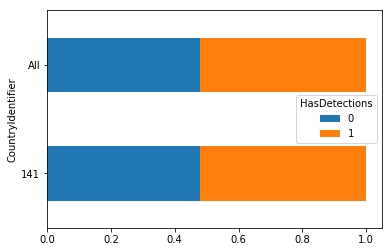

In [241]:


countries = final.pivot_table(index='CountryIdentifier', columns='HasDetections', 
                        values=['MachineIdentifier'],aggfunc=len, margins=True)

countries = countries.reindex(countries['MachineIdentifier'].sort_values(by='All', ascending=False).index)

# display(countries.MachineIdentifier.head(10))

countries_rate = countries.MachineIdentifier[[0,1]].div(countries.MachineIdentifier[[0,1]].sum(1).astype(float),
                             axis=0)

countries_rate.head(10).plot(kind='barh', 
                    stacked=True) #figsize=(4,8))

### Data Definitions


| <p align="left"> Data Field | <p align="left"> Description of Data Field | <p align="left"> Data Type | <p align="left">Data Quality |
| :--- | :--- | :--- | :--- |
| <p align="left"> HasDetections  | <p align="left"> Ground truth and indicates that Malware was detected on the machine and will be the key attribute used to predict whether the machine has been compromised. | <p align="left"> Response Variable (1/0) | <p align="left"> |
| <p align="left"> ProductName | <p align="left"> Defender state information e.g. win8defender | <p align="left"> Categorical | <p align="left"> **Removed** 96% of its values are the same| 
| <p align="left"> EngineVersion | <p align="left"> Defender state information e.g. 1.1.12603.0 |  <p align="left"> Categorical | <p align="left"> |
| <p align="left"> AppVersion | <p align="left"> Defender state information e.g. 4.9.10586.0 | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> AvSigVersion | <p align="left"> Defender state information e.g. 1.217.1014.0 | <p align="left"> | <p align="left"> |
| <p align="left"> IsBeta | <p align="left"> Defender state information e.g. false | <p align="left"> Categorical | <p align="left"> **Removed** 100% of its values are the same.|
| <p align="left"> RtpStateBitfield | <p align="left"> Is Real Time Transport Protocol Enabled | <p align="left"> Categorical | <p align="left"> Replacing any null values with -1, indicating unknown |
| <p align="left"> IsSxsPassiveMode | <p align="left"> Is Side by Side Assempblies in Passive Mode | <p align="left"> Boolean | <p align="left"> **Removed** 99% of its values are the same.|
| <p align="left"> DefaultBrowsersIdentifier | <p align="left"> ID for the machine's default browser | <p align="left"> Categorical | <p align="left"> **Removed** 93% of its values missing are the same |
| <p align="left"> AVProductStatesIdentifier | <p align="left"> ID for the specific configuration of a user's antivirus software | <p align="left"> Categorical | <p align="left"> Replace null values with field's mode <i>53447</i> |
| <p align="left"> AVProductsInstalled | <p align="left"> Whether AV Products are installed | <p align="left"> Categorical  | <p align="left"> Replace null values with 1, the highest mode |
| <p align="left"> AVProductsEnabled | <p align="left"> <p align=left"> Whether or not the AV is enabled | <p align="left"> Categorical | <p align="left"> | Replaced null values with 0, indicating not enabled |
| <p align="left"> HasTpm | <p align="left"> True if machine has tpm | <p align="left"> Boolean | <p align="left"> **Removed** 99% of its values are the same.|
| <p align="left"> CountryIdentifier | <p align="left"> ID for the country the machine is located in | <p align="left"> Categorical | <p align="left"> Filtered by <i>141</i> |
| <p align="left"> CityIdentifier | <p align="left"> ID for the city the machine is located in | <p align="left"> Categorical | <p align="left"> Replace null values with field's mode 92213 |
| <p align="left"> OrganizationIdentifier | <p align="left"> ID for the organization the machine belongs in, organization ID is mapped to both specific companies and -broad industries | <p align="left"> Categorical | <p align="left">Replace any null values with 0, indicating no organization |
| <p align="left"> GeoNameIdentifier | <p align="left"> ID for the geographic region a machine is located in | <p align="left"> Categorical | <p align="left"> Replace null values with the  field's mode <i>167</i> |
| <p align="left"> LocaleEnglishNameIdentifier | <p align="left"> English name of Locale ID of the current user | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Platform | <p align="left"> Calculates platform name (of OS related properties and processor property) | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Processor | <p align="left"> This is the process architecture of the installed operating system | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> OsVer | <p align="left"> Version of the current operating system | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> OsBuild | <p align="left"> Build of the current operating system | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> OsSuite | <p align="left"> Product suite mask for the current operating system. | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> OsPlatformSubRelease | <p align="left"> Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2) | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> OsBuildLab | <p align="left"> Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022 |  <p align="left"> Categorical | <p align="left"> Replace null value with the field's model that is aligned by OSBuild and Processor |
| <p align="left"> SkuEdition | <p align="left"> The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class. | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> IsProtected | <p align="left"> This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected. | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> AutoSampleOptIn | <p align="left"> This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+ | <p align="left"> Categorical | <p align="left"> **Removed** 99.99% of its values are the same.|
| <p align="left"> PuaMode | <p align="left"> Pua Enabled mode from the service | <p align="left"> Boolean | <p align="left"> **Removed** 99.99% of its values are missing|
| <p align="left"> SMode | <p align="left"> This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed | <p align="left"> Boolean | <p align="left"> **Removed** 93% of its values are the same |
| <p align="left"> IeVerIdentifier | <p align="left"> Determination of the last known state of the operating system| <p align="left"> Categorical | <p align="left"> | Replace null values with <i>-1</i>, indicating unknown |
| <p align="left"> SmartScreen | <p align="left"> This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry. | <p align="left"> Categorical | <p align="left"> Replaced all missings values with ExistsNotSet along with any special character values. |
| <p align="left"> Firewall | <p align="left"> This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service. | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> UacLuaenable | <p align="left"> This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA. | <p align="left"> Boolean | <p align="left"> **Removed** 99% of its values are the same |
| <p align="left"> Census_MDC2FormFactor | <p align="left"> A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...) | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_DeviceFamily | <p align="left"> AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone | <p align="left"> Categorical | <p align="left"> **Removed** 99% of its values are the same |
| <p align="left"> Census_OEMNameIdentifier | <p align="left"> OEM Identifier COde | <p align="left"> Categorical | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> mode |
| <p align="left"> Census_OEMModelIdentifier | <p align="left"> OEM Model Identifier | <p align="left"> Categorical | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> mode |
| <p align="left"> Census_ProcessorCoreCount | <p align="left"> Number of logical cores in the processor | <p align="left"> Continous | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> median |
| <p align="left"> Census_ProcessorManufacturerIdentifier | <p align="left"> Processor Manufacturer | <p align="left"> Categorical | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> mode |
| <p align="left"> Census_ProcessorModelIdentifier | <p align="left"> Processor Model | <p align="left"> Categorical | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> mode |
| <p align="left"> Census_ProcessorClass | <p align="left"> A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated | <p align="left"> Categorical | <p align="left"> **Removed** 99% of its values are the same |
| <p align="left"> Census_PrimaryDiskTotalCapacity | <p align="left"> Amount of disk space on primary disk of the machine in MB | <p align="left"> Continous | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> median |
| <p align="left"> Census_PrimaryDiskTypeName | <p align="left"> Friendly name of Primary Disk Type HDD or SSD | | <p align="left"> Categorical | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> mode and replace <i>Unspecified</i> with <i>Other</i> |
| <p align="left"> Census_SystemVolumeTotalCapacity | <p align="left"> The size of the partition that the System volume is installed on in MB | <p align="left"> Continous | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> median |
| <p align="left"> Census_HasOpticalDiskDrive | <p align="left"> True indicates that the machine has an optical disk drive (CD/DVD) | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> Census_TotalPhysicalRAM | <p align="left"> Retrieves the physical RAM in MB | <p align="left"> Continous | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> median |
| <p align="left"> Census_ChassisTypeName | <p align="left"> Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx | <p align="left"> Categorical | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> mode and Updated all unknown or numerical values to <i>Other</i> |
| <p align="left"> Census_InternalPrimaryDiagonalDisplaySizeInInches | <p align="left"> Retrieves the physical diagonal length in inches of the primary display | <p align="left"> Continous | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> median |
| <p align="left"> Census_InternalPrimaryDisplayResolutionHorizontal | <p align="left"> Retrieves the number of pixels in the horizontal direction of the internal display. | <p align="left"> Continous | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> median |
| <p align="left"> Census_InternalPrimaryDisplayResolutionVertical | <p align="left"> Retrieves the number of pixels in the vertical direction of the internal display | <p align="left"> Continous | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> median |
| <p align="left"> Census_PowerPlatformRoleName | <p align="left"> Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device | <p align="left"> Categorical | <p align="left"> Replace any null and <i>Unknown</i> values with <i>Other</i> |
| <p align="left"> Census_InternalBatteryType | <p align="left"> Tye of Battert | <p align="left"> Categorical | <p align="left">**Removed** 70% missing data and unable to classify values by **Census_MDC2FormFactor** |
| <p align="left"> Census_InternalBatteryNumberOfCharges | <p align="left"> Number of Charges on Battery | <p align="left"> Continous | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> median |
| <p align="left"> Census_OSVersion | <p align="left"> Numeric OS version Example 10.0.10130.0 | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSArchitecture | <p align="left"> Architecture on which the OS is based. Derived from OSVersionFull. Example amd64 | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSBranch | <p align="left"> Branch of the OS extracted from the OsVersionFull. Example OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005 | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSBuildNumber | <p align="left"> OS Build number extracted from the OsVersionFull. Example OsBuildNumber = 10512 or 10240 | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSBuildRevision | <p align="left"> OS Build revision extracted from the OsVersionFull. Example OsBuildRevision = 1000 or 16458 | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSEdition | <p align="left"> Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSSkuName | <p align="left"> OS edition friendly name (currently Windows only) | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSInstallTypeName | <p align="left"> Friendly description of what install was used on the machine i.e. clean | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSInstallLanguageIdentifier | <p align="left"> Language of Installer | <p align="left"> Categorical | <p align="left"> Replace null values with <i>Unknown</i>, unable to classify mode |
| <p align="left"> Census_OSUILocaleIdentifier | <p align="left"> Locale of Installer | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_OSWUAutoUpdateOptionsName | <p align="left"> Friendly name of the WindowsUpdate auto-update settings on the machine. | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_IsPortableOperatingSystem | <p align="left"> Indicates whether OS is booted up and running via Windows-To-Go on a USB stick. | <p align="left"> Boolean | <p align="left"> **Removed** 99% of its values are the same.|
| <p align="left"> Census_GenuineStateName | <p align="left"> Friendly name of OSGenuineStateID. 0 = Genuine | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> Census_ActivationChannel | <p align="left"> Retail license key or Volume license key for a machine. | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_IsFlightingInternal | <p align="left"> Is Driver Flighting Enabled | <p align="left"> Boolean | <p align="left"> Updated null values to <i>0</i> |
| <p align="left"> Census_IsFlightsDisabled | <p align="left"> Indicates if the machine is participating in flighting. | <p align="left"> Boolean | <p align="left"> **Removed** 98% of its values are the same \ missing |
| <p align="left"> Census_FlightRing | <p align="left"> The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring. | <p align="left"> Categorical | <p align="left"> |
| <p align="left"> Census_ThresholdOptIn | <p align="left"> Driver Device Threshold Enabled | <p align="left"> Boolean | <p align="left"> **Removed** 99.99% of its values are the same|
| <p align="left"> Census_FirmwareManufacturerIdentifier | <p align="left"> Manufcator of Firemware | <p align="left"> Categorical | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> mode |
| <p align="left"> Census_FirmwareVersionIdentifier | <p align="left"> Version of Firemware | <p align="left"> Categorical | <p align="left"> Replace null values with <b>Census_MDC2FormFactor's</b> mode |
| <p align="left"> Census_IsSecureBootEnabled | <p align="left"> Indicates if Secure Boot mode is enabled. | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> Census_IsWIMBootEnabled | <p align="left"> Is image file boot enabled | <p align="left"> Boolean | <p align="left"> **Removed** 100% of its values are the same |
| <p align="left"> Census_IsVirtualDevice | <p align="left"> Identifies a Virtual Machine (machine learning model) | <p align="left"> Boolean | <p align="left"> **Removed** 99% of its values are the same.|
| <p align="left"> Census_IsTouchEnabled | <p align="left"> Is this a touch device ? | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> Census_IsPenCapable | <p align="left"> Is the device capable of pen input ? | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> Census_IsAlwaysOnAlwaysConnectedCapable | <p align="left"> Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected. | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> Wdft_IsGamer | <p align="left"> Indicates whether the device is a gamer device or not based on its hardware combination. | <p align="left"> Boolean | <p align="left"> |
| <p align="left"> Wdft_RegionIdentifier | <p align="left"> Region Code | <p align="left"> Categorical | <p align="left"> Replaced any null values with its mode <i>10</i> |

### Data Quality

In order to understand the quality of the data, we did an extensive review of the data and determined which fields should be considered categorical, continous, or boolean.  We converted 23 id and category fields to object as well as removed outliers to make values boolean.  

In order to help provide easier development, we created 4 array of column names: cols_booleans, cols_numerical, cols_categorical, and cols_categorical_large. The values with over 100 possible values were moved to its own bucket, cols_categorical_large, requiring special care to review in order to determine if we could cluster values together.

The remaining code are steps we took to clean our data.

In [29]:
# Load Column groups to help with data wrangling
%run -i ColumnArrays.py

In [30]:
print( "cols_booleans" ) 
display( cols_booleans )
print( "cols_numerical" )
display( cols_numerical )
print( "cols_categorical" )
display( cols_categorical )
print( "cols_categorical_large" )
display( cols_categorical_large )

#Convert features to right data type
final[cols_categorical] = final[cols_categorical].astype(object)
final[cols_categorical_large] = final[cols_categorical_large].astype(object)

cols_booleans


['IsProtected',
 'Firewall',
 'Census_HasOpticalDiskDrive',
 'Census_IsFlightingInternal',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

cols_numerical


['Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical']

cols_categorical


['EngineVersion',
 'RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'OrganizationIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing',
 'Wdft_RegionIdentifier']

cols_categorical_large


['AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_OSVersion',
 'Census_OSBuildRevision',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'LocaleEnglishNameIdentifier']

#### 1) Understand scope of missing data \ fill rate on values
The following section outlines  the percentage of missing data and fields with frequency of same values.  A benefit of reviewing the percentage of features with the same value is to see which fields we can easily provide median or mode values and others that may be hard to provide a good value for.  

The top 3 fields, PUAMode, Census_ProcessorClass, and DefaultBrowsersIdentifier had over 93% of values missing.  These values were exluded from our report due to lack of data in order to predict our hypotheses.


In [244]:
#create new summary table
temp_data = []

for col in final.columns:
    temp_data.append((col, final[col].isnull().sum() * 100 / final.shape[0],
                final[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                final[col].dtype))

temp_data = pd.DataFrame(temp_data, columns=['Attribute','Missing_values [%]',
                                 'Higher_frequency_data [%]','Data_type'])

#sort by Freqency values
display( temp_data.loc[temp_data["Missing_values [%]"] > 0,:]
        .sort_values(by =[temp_data.columns[1]], ascending=False) )

Attribute  Missing_values [%]  \
28                                            PuaMode           99.992802   
41                              Census_ProcessorClass           99.519512   
8                           DefaultBrowsersIdentifier           93.517610   
68                         Census_IsFlightingInternal           83.188317   
52                         Census_InternalBatteryType           70.148855   
71                              Census_ThresholdOptIn           62.470644   
75                            Census_IsWIMBootEnabled           62.352772   
31                                        SmartScreen           30.604569   
29                                              SMode            7.800283   
15                             OrganizationIdentifier            4.041558   
53              Census_InternalBatteryNumberOfCharges            3.557771   
81                              Wdft_RegionIdentifier            3.280336   
80                                       Wdft_IsGamer            3.280336   
69                           Census_IsFlightsDisabled            1.959443   
14                                     CityIdentifier            1.903057   
72              Census_FirmwareManufacturerIdentifier            1.604026   
73                   Census_FirmwareVersionIdentifier            1.442964   
32                                           Firewall            0.994568   
46                            Census_TotalPhysicalRAM            0.930383   
79            Census_IsAlwaysOnAlwaysConnectedCapable            0.904289   
37                          Census_OEMModelIdentifier            0.824208   
36                           Census_OEMNameIdentifier            0.766921   
62                 Census_OSInstallLanguageIdentifier            0.630153   
44                   Census_SystemVolumeTotalCapacity            0.614257   
42                    Census_PrimaryDiskTotalCapacity            0.614257   
48  Census_InternalPrimaryDiagonalDisplaySizeInInches            0.554571   
49  Census_InternalPrimaryDisplayResolutionHorizontal            0.553371   
50    Census_InternalPrimaryDisplayResolutionVertical            0.553371   
30                                    IeVerIdentifier            0.540174   
11                                  AVProductsEnabled            0.475389   
9                           AVProductStatesIdentifier            0.475389   
10                                AVProductsInstalled            0.475389   
26                                        IsProtected            0.473290   
40                    Census_ProcessorModelIdentifier            0.469391   
39             Census_ProcessorManufacturerIdentifier            0.469391   
38                          Census_ProcessorCoreCount            0.469391   
76                             Census_IsVirtualDevice            0.447796   
6                                    RtpStateBitfield            0.419602   
43                         Census_PrimaryDiskTypeName            0.164062   
33                                       UacLuaenable            0.150265   
47                             Census_ChassisTypeName            0.011097   
16                                  GeoNameIdentifier            0.001800   
51                       Census_PowerPlatformRoleName            0.000900   
24                                         OsBuildLab            0.000300   

    Higher_frequency_data [%] Data_type  
28                  99.992802    object  
41                  99.519512    object  
8                   93.517610   float64  
68                  83.188317   float64  
52                  70.148855    object  
71                  62.470644   float64  
75                  62.352772   float64  
31                  44.501231    object  
29                  92.132833   float64  
15                  79.914580    object  
53                  60.295551   float64  
81                  96.186988    object  
80                  76.631545   

In [245]:
#sort by Freqency values
display( temp_data.loc[temp_data["Higher_frequency_data [%]"] > 80,:]
        .sort_values(by =[temp_data.columns[2]], ascending=False) )

Attribute  Missing_values [%]  \
5                                    IsBeta            0.000000   
13                        CountryIdentifier            0.000000   
27                          AutoSampleOptIn            0.000000   
28                                  PuaMode           99.992802   
65         Census_IsPortableOperatingSystem            0.000000   
35                      Census_DeviceFamily            0.000000   
33                             UacLuaenable            0.150265   
41                    Census_ProcessorClass           99.519512   
76                   Census_IsVirtualDevice            0.447796   
1                               ProductName            0.000000   
12                                   HasTpm            0.000000   
7                          IsSxsPassiveMode            0.000000   
69                 Census_IsFlightsDisabled            1.959443   
78                      Census_IsPenCapable            0.000000   
6                          RtpStateBitfield            0.419602   
32                                 Firewall            0.994568   
11                        AVProductsEnabled            0.475389   
81                    Wdft_RegionIdentifier            3.280336   
79  Census_IsAlwaysOnAlwaysConnectedCapable            0.904289   
20                                    OsVer            0.000000   
18                                 Platform            0.000000   
45               Census_HasOpticalDiskDrive            0.000000   
70                        Census_FlightRing            0.000000   
26                              IsProtected            0.473290   
8                 DefaultBrowsersIdentifier           93.517610   
29                                    SMode            7.800283   
66                  Census_GenuineStateName            0.000000   
16                        GeoNameIdentifier            0.001800   
55                    Census_OSArchitecture            0.000000   
19                                Processor            0.000000   
17              LocaleEnglishNameIdentifier            0.000000   
77                    Census_IsTouchEnabled            0.000000   
68               Census_IsFlightingInternal           83.188317   

    Higher_frequency_data [%] Data_type  
5                  100.000000     int64  
13                 100.000000     int64  
27                  99.995201     int64  
28                  99.992802    object  
65                  99.957410     int64  
35                  99.891125    object  
33                  99.631686   float64  
41                  99.519512    object  
76                  99.135002   float64  
1                   98.952944    object  
12                  98.795181     int64  
7                   98.637717     int64  
69                  98.040557   float64  
78                  97.568167     int64  
6                   96.998899    object  
32                  96.996800   float64  
11                  96.653680    object  
81                  96.186988    object  
79                  95.713999   float64  
20                  95.713399    object  
18                  95.612622    object  
45                  94.818107     int64  
70                  93.997199    object  
26                  93.694869   float64  
8                   93.517610   float64  
29                  92.132833   float64  
66                  91.314924    object  
16                  88.886389    object  
55                  88.734925    object  
19                  88.723227    object  
17                  86.775181    object  
77                  86.477951     int64  
68                  83.188317   float64

#### 2) Data Imputation
The dataset was analyzed and three key classifications of data were utilized:
* Categorical Variables: The process  followed for categorical was to identify its mode for each feature to replace with.  However, to try and prevent as much bias in our data, we would factor in another feature to help classify our features.  For example, <b>OsBuildLab</b> missing values were derived from OSBuild and Processor.

* Continous Variables: All the continous variables' values were derived from its median by grouping <b>Census_MDC2FormFactor</b>.  We were able to classify how much RAM a machine has based on if it was a Tablet or a Server.

* Boolean Variables: Any values missing or we felt was an outlier was imputed witht he value of 0.

##### A description of all the values updated or removed can be found in the section "Data Meaning Type".

In [4]:
# Smart Screen fill miising values and fix characters issue

final.SmartScreen.fillna('ExistsNotSet', inplace=True)
final.SmartScreen.replace({"off":"Off","00000000":"ExistsNotSet","&#x02;" :"ExistsNotSet",
                                 "&#x01;" :"ExistsNotSet"},inplace=True)

# currently renamed "Census_PrimaryDiskTypeName" unknown data into one category
final.Census_PrimaryDiskTypeName.replace({"Unspecified":"Other"},inplace=True)

# currently renamed "Census_ChassisTypeName" unknown data into one category

final.Census_ChassisTypeName.replace({"UNKNOWN":"Other","Unknown":"Other","0" :"Other",
                                "30" :"Other",
                                "35" :"Other",
                                "112" :"Other",
                                "76" :"Other",
                                "39" :"Other"},inplace=True)

# currently renamed "Census_PowerPlatformRoleName" unknown data into one category

final.Census_PowerPlatformRoleName.fillna('Other', inplace=True)

final.Census_PowerPlatformRoleName.replace({"UNKNOWN":"Other"},inplace=True)

#IsFlightsDisabled and IsFlightingInternal  
final.Census_IsFlightingInternal.fillna("1", inplace=True)
final.Census_IsFlightsDisabled.fillna("1", inplace=True)

#Wdft_RegionIdentifier
final.Wdft_RegionIdentifier.astype(float,inplace=True)
final.Wdft_RegionIdentifier.fillna("10",inplace=True)
final.Wdft_RegionIdentifier.astype(object,inplace=True)

#OrganizationIdentifier
final.OrganizationIdentifier.fillna("0",inplace=True)

#RtpStateBitfield
final.RtpStateBitfield.fillna("-1",inplace=True)

#CityIdentifier
final.CityIdentifier.astype(float,inplace=True)
final.CityIdentifier.fillna("92213",inplace=True)
final.CityIdentifier.astype(object,inplace=True)

#Census_OSInstallLanguageIdentifier unable to classify the value
final.Census_OSInstallLanguageIdentifier.fillna("Unknown",inplace=True)

#AVProductsInstalled 1 was the highest mode
final.AVProductsInstalled.astype(float, inplace=True)
final.AVProductsInstalled.fillna(1,inplace=True)
final.AVProductsInstalled.astype(object, inplace=True)

#AVProductsEnabled default to 0 if no value
final.AVProductsEnabled.astype(float,inplace=True)
final.AVProductsEnabled.fillna(0,inplace=True)

#AVProductStatesIdentifier default to 53447 highest mode
final.AVProductStatesIdentifier.astype(float, inplace=True)
final.AVProductStatesIdentifier.fillna(53447,inplace=True)
final.AVProductStatesIdentifier.astype(object, inplace=True)

#GeoNameIdentifier167.0
final.GeoNameIdentifier.fillna("167",inplace=True)

#OsBuildLab match by OSBuild and Processor
final.OsBuildLab.fillna("17134.1.amd64fre.rs4_release.180410-1804",inplace=True)

#IeVerIdentifier default -1, unable to classify
final.IeVerIdentifier.fillna("-1",inplace=True)

#Defautl all boolean nulls to 0
final.IsProtected.fillna(0,inplace=True)
final.Firewall.fillna(0,inplace=True)
final.UacLuaenable.fillna(0,inplace=True)
final.Census_ThresholdOptIn.fillna(0,inplace=True)
final.Census_IsWIMBootEnabled.fillna(0,inplace=True)
final.Census_IsVirtualDevice.fillna(0,inplace=True)
final.Census_IsAlwaysOnAlwaysConnectedCapable.fillna(0,inplace=True)
final.Wdft_IsGamer.fillna(0,inplace=True)

In [5]:
cols = np.append(["Census_MDC2FormFactor"], cols_numerical)

df_grouped = final.groupby("Census_MDC2FormFactor").agg({
    "Census_ProcessorCoreCount":"median",
    "Census_PrimaryDiskTotalCapacity":"median",
    "Census_SystemVolumeTotalCapacity":"median",
    "Census_TotalPhysicalRAM":"median",
    "Census_InternalPrimaryDiagonalDisplaySizeInInches":"median",
    "Census_InternalPrimaryDisplayResolutionHorizontal":"median",
    "Census_InternalPrimaryDisplayResolutionVertical":"median",
    "Census_InternalBatteryNumberOfCharges":"median"
})

# Find the mode instead of median
cols = [
    "Census_FirmwareManufacturerIdentifier",
    "Census_FirmwareVersionIdentifier",
    "Census_OEMNameIdentifier",
    "Census_OEMModelIdentifier",
#     "Census_ProcessorModelIdentifier",
    "Census_ProcessorManufacturerIdentifier",
    "Census_PrimaryDiskTypeName",
    "Census_ChassisTypeName"
]
for col in cols:
    imputes = final.groupby(["Census_MDC2FormFactor",col]).agg({
    "MachineIdentifier":"count"})

    imputes.reset_index(level=[col], inplace=True)
    # Max count to identify the right firmware
    idx = imputes.groupby(["Census_MDC2FormFactor"])['MachineIdentifier'].transform(max) == imputes['MachineIdentifier']
    imputes.drop(["MachineIdentifier"], axis=1, inplace=True)
    # Merge df_grouped
    df_grouped = pd.merge(df_grouped,imputes[idx], left_index = True, right_index = True, how="inner")


# Census_ProcessorModelIdentifier
# Accounting for categories with same counts.  Picking the first one
imputes = final.groupby(["Census_MDC2FormFactor","Census_ProcessorModelIdentifier"]).agg({
"MachineIdentifier":"count"})

imputes.reset_index(level=["Census_MDC2FormFactor","Census_ProcessorModelIdentifier"], inplace=True)
# Max count to identify the right firmware
idx = imputes.groupby(["Census_MDC2FormFactor"])['MachineIdentifier'].transform(max) == imputes['MachineIdentifier']
# Merge df_grouped

imputes = imputes[idx]

imputes['row_id'] = imputes.groupby(['Census_MDC2FormFactor']).cumcount()+1

imputes = imputes.loc[imputes["row_id"]==1,]
imputes.set_index('Census_MDC2FormFactor',inplace=True)

imputes.drop(["MachineIdentifier","row_id"], axis=1, inplace=True)

df_grouped = pd.merge(df_grouped,imputes, left_index = True, right_index = True, how="inner")

In [6]:
for name, group in df_grouped.items():
    for key, value in group.items():
        mask = final["Census_MDC2FormFactor"]==key
#         print( name + "." + key + " Value: " + str(value) )
#         print( "Updating: " + str(final.loc[final[name].isnull() & mask, name].shape) )
        final.loc[final[name].isnull() & mask, name] = value
        final[name].replace(-1,value,inplace=True)   
        

In [221]:
# Save Clean File
# final.to_csv("data/clean.final.csv")


### Simple Statistics

The features below is represents the hardware configurations on a machine.  Reviewing each data set, it appears majority of the machines in our data are personal desktops.  They are a typical desktop with 4 cores, 4 gigabytes of memory, and standard resolution on the monitor.  The majority are desktops since majority has no battery charges.

This data gives us a better understanding what our population of users could be.  One of the hardest aspect of this dataset is not knowing what type of user would be suspectable to Malware.  It appears these machines are individuals vs. server or custom corproate builds.

In [222]:
final[cols_numerical].describe()

Census_ProcessorCoreCount  Census_PrimaryDiskTotalCapacity  \
count              333411.000000                     3.334110e+05   
mean                    3.195485                     5.688072e+05   
std                     1.568252                     3.476213e+05   
min                     1.000000                     1.022700e+04   
25%                     2.000000                     3.052450e+05   
50%                     4.000000                     4.769400e+05   
75%                     4.000000                     9.538690e+05   
max                    64.000000                     1.716940e+07   

       Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  \
count                      3.334110e+05            333411.000000   
mean                       5.332372e+05              5268.058777   
std                        3.405699e+05              3858.531097   
min                        9.676000e+03               512.000000   
25%                        2.905430e+05              4096.000000   
50%                        4.636820e+05              4096.000000   
75%                        9.269920e+05              8192.000000   
max                        1.716879e+07            786432.000000   

       Census_InternalPrimaryDiagonalDisplaySizeInInches  \
count                                      333411.000000   
mean                                           15.860255   
std                                             4.964178   
min                                             5.500000   
25%                                            13.900000   
50%                                            15.500000   
75%                                            15.600000   
max                                           142.000000   

       Census_InternalPrimaryDisplayResolutionHorizontal  \
count                                      333411.000000   
mean                                         1436.107384   
std                                           250.134264   
min                                           320.000000   
25%                                          1366.000000   
50%                                          1366.000000   
75%                                          1366.000000   
max                                          6016.000000   

       Census_InternalPrimaryDisplayResolutionVertical  \
count                                    333411.000000   
mean                                        827.462102   
std                                         144.373430   
min                                         240.000000   
25%                                         768.000000   
50%                                         768.000000   
75%                                         800.000000   
max                                        3840.000000   

       Census_InternalBatteryNumberOfCharges  
count                           3.334110e+05  
mean                            1.077043e+09  
std                             1.861680e+09  
min                             0.000000e+00  
25%                             0.000000e+00  
50%                             0.000000e+00  
75%                             4.294967e+09  
max                             4.294967e+09

There is also some evidence that machines with higher performance may be more vulnerable to malware.

In [223]:
cols = np.append(["HasDetections"],cols_numerical)
final[cols].groupby(by='HasDetections').mean()


Census_ProcessorCoreCount  Census_PrimaryDiskTotalCapacity  \
HasDetections                                                               
0                               3.169518                    546822.643511   
1                               3.219487                    589127.574981   

               Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  \
HasDetections                                                              
0                                 512973.714577              5081.171897   
1                                 551966.928248              5440.799409   

               Census_InternalPrimaryDiagonalDisplaySizeInInches  \
HasDetections                                                      
0                                                      15.734224   
1                                                      15.976746   

               Census_InternalPrimaryDisplayResolutionHorizontal  \
HasDetections                                                      
0                                                    1431.957352   
1                                                    1439.943283   

               Census_InternalPrimaryDisplayResolutionVertical  \
HasDetections                                                    
0                                                   829.135312   
1                                                   825.915545   

               Census_InternalBatteryNumberOfCharges  
HasDetections                                         
0                                       1.057517e+09  
1                                       1.095091e+09

To better understand its higher mean, we perform visualization for different hardware configurations between machines having a detection or not.  The box plots were view on the log scale, with the exception of **Census_ProcessorCoreCount**.

Visually, only **Census_PrimaryDiskTotalCapacity** shows a difference of its mean and median between machines being attacked.

Text(0.5,0.98,'')

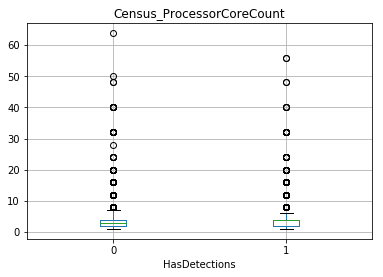

In [224]:
#Most of our data has processor count <10
final.boxplot(column='Census_ProcessorCoreCount', by = 'HasDetections')
plt.suptitle("")

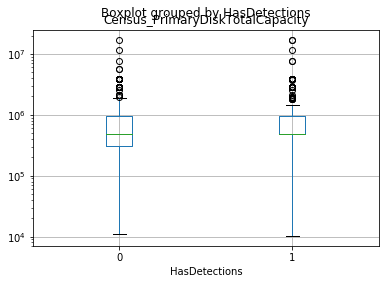

In [225]:
ax = final.boxplot(
    column='Census_PrimaryDiskTotalCapacity',
    by = 'HasDetections')

ax.set_yscale('log')


Text(0.5,0.98,'')

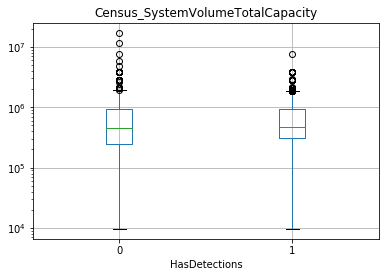

In [226]:
ax = final.boxplot(
    column='Census_SystemVolumeTotalCapacity',
    by = 'HasDetections')
ax.set_yscale('log')
plt.suptitle("")

Text(0.5,0.98,'')

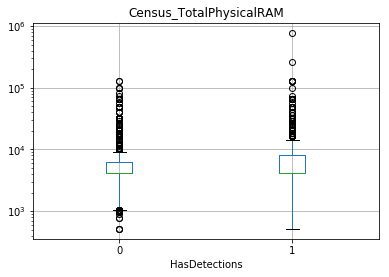

In [227]:
ax = final.boxplot(
    column='Census_TotalPhysicalRAM', 
    by = 'HasDetections')
ax.set_yscale('log')
plt.suptitle("")

Below are the mode statistics for our categorical variables.  From our review of the different categories, we found that the values are heavily weighted to 1 or 2 values.  We believe this is because there are many different scenarios that make a machine vulnerable.  We hope through unsupervised clustering on categorical features, we can learn more about how the data explains the store of detections.

In [252]:
for col in cols_categorical:
    display(final.groupby(col).agg({'MachineIdentifier':"count"}) )


MachineIdentifier
EngineVersion                   
1.1.11701.0                    6
1.1.11903.0                    1
1.1.12101.0                    4
1.1.12400.0                    5
1.1.12603.0                    2
1.1.12706.0                    1
1.1.12805.0                  132
1.1.12902.0                  251
1.1.13000.0                  220
1.1.13103.0                  245
1.1.13202.0                  230
1.1.13303.0                  421
1.1.13406.0                    1
1.1.13407.0                  434
1.1.13504.0                 4579
1.1.13601.0                  353
1.1.13701.0                  236
1.1.13704.0                  244
1.1.13804.0                  470
1.1.13902.0                    5
1.1.13903.0                  484
1.1.14001.0                    1
1.1.14002.0                    7
1.1.14003.0                  700
1.1.14102.0                    1
1.1.14103.0                    2
1.1.14104.0                 4301
1.1.14201.0                   10
1.1.14202.0                  809
1.1.14303.0                   19
1.1.14305.0                  254
1.1.14306.0                 1271
1.1.14405.2                 1637
1.1.14500.2                   15
1.1.14500.5                 2184
1.1.14600.4                 6396
1.1.14700.3                   43
1.1.14700.4                   36
1.1.14700.5                 2036
1.1.14800.1                   39
1.1.14800.3                 5738
1.1.14901.3                   77
1.1.14901.4                 9474
1.1.15000.1                  109
1.1.15000.2                11263
1.1.15100.1               132819
1.1.15200.1               139049
1.1.15300.5                 2374
1.1.15300.6                 4423

MachineIdentifier
RtpStateBitfield                   
0.0                            6275
1.0                              30
3.0                             133
5.0                             766
7.0                          323405
8.0                            1403
-1                             1399

MachineIdentifier
AVProductsInstalled                   
1.0                             213802
2.0                             111728
3.0                               7647
4.0                                224
5.0                                 10

MachineIdentifier
AVProductsEnabled                   
0.0                             2836
1.0                           322254
2.0                             8238
3.0                               83

MachineIdentifier
OrganizationIdentifier                   
3.0                                     3
4.0                                    11
10.0                                    1
11.0                                   50
14.0                                    1
18.0                                51041
20.0                                    3
21.0                                    2
27.0                               266444
28.0                                    4
32.0                                    2
33.0                                   11
36.0                                  134
37.0                                   40
40.0                                    1
46.0                                    1
47.0                                   89
48.0                                 2088
49.0                                   10
0                                   13475

MachineIdentifier
Platform                      
windows10               318783
windows2016                362
windows7                  3430
windows8                 10836

MachineIdentifier
Processor                   
arm64                      1
x64                   295813
x86                    37597

MachineIdentifier
OsVer                      
10.0.0.0             319119
10.0.1.0                 13
10.0.3.0                 13
6.1.0.0                  35
6.1.1.0                3393
6.1.3.0                   2
6.3.0.0               10828
6.3.0.16                  1
6.3.1.0                   3
6.3.3.0                   4

MachineIdentifier
OsBuild                   
7600                    34
7601                  3396
9600                 10836
10240                10622
10586                18006
14393                37805
15063                45207
16299               104693
17134               102566
17634                    1
17655                    1
17661                    4
17666                    1
17672                    2
17677                    3
17682                    2
17686                    6
17692                   45
17713                    9
17730                    1
17733                    7
17735                   14
17738                   32
17741                    6
17744                   34
17746                   12
17751                   13
17754                   12
17755                    6
17758                   24
17760                    4
17763                    4
18234                    1
18237                    2

MachineIdentifier
OsSuite                   
16                      28
49                       1
256                 101087
272                    276
274                      1
305                     39
400                     17
768                 231953
784                      9

MachineIdentifier
OsPlatformSubRelease                   
prers5                              246
rs1                               37805
rs2                               45207
rs3                              104693
rs4                              102566
th1                               10622
th2                               18006
windows7                           3430
windows8.1                        10836

MachineIdentifier
SkuEdition                        
Cloud                          572
Education                      391
Enterprise                     604
Enterprise LTSB                547
Home                        230442
Invalid                       2586
Pro                          98179
Server                          90

MachineIdentifier
SmartScreen                    
Block                       533
ExistsNotSet             175654
Off                        5248
Prompt                      643
RequireAdmin             148372
Warn                       2961

MachineIdentifier
Census_MDC2FormFactor                   
AllInOne                           31388
Convertible                        18177
Desktop                            46802
Detachable                          7402
LargeServer                           12
LargeTablet                         2563
MediumServer                          44
Notebook                          222938
PCOther                             2920
SmallServer                          320
SmallTablet                          845

MachineIdentifier
Census_ProcessorManufacturerIdentifier                   
1.0                                                 78557
3.0                                                    56
5.0                                                253232
10.0                                                    1

MachineIdentifier
Census_PrimaryDiskTypeName                   
HDD                                    263501
Other                                   12832
SSD                                     43157
UNKNOWN                                 13374

MachineIdentifier
Census_ChassisTypeName                   
AllinOne                            23878
BusExpansionChassis                    24
Convertible                          2721
Desktop                             47487
Detachable                           1442
HandHeld                             1622
Laptop                              17690
LowProfileDesktop                    3612
LunchBox                              179
MainServerChassis                     604
MiniPC                                339
MiniTower                            1969
MultisystemChassis                      1
Notebook                           209777
Other                                5902
Portable                            13572
RackMountChassis                       86
SealedCasePC                            1
SpaceSaving                          1617
StickPC                                 1
SubNotebook                            51
Tablet                                347
Tower                                 452

MachineIdentifier
Census_PowerPlatformRoleName                   
AppliancePC                                 152
Desktop                                   72136
EnterpriseServer                            257
Mobile                                   243379
Other                                       833
SOHOServer                                 1883
Slate                                     11916
Workstation                                2855

MachineIdentifier
Census_OSArchitecture                   
amd64                             295852
arm64                                  1
x86                                37558

MachineIdentifier
Census_OSBranch                             
rs1_release                            40801
rs2_release                            46144
rs3_release                            46984
rs3_release_svc_escrow                 56842
rs3_release_svc_escrow_im                186
rs4_release                           105310
rs5_release                              177
rs_prerelease                             32
rs_prerelease_flt                         41
th1                                     2755
th1_st1                                 7897
th2_release                            13708
th2_release_sec                        12534

MachineIdentifier
Census_OSBuildNumber                   
10240                             10652
10586                             26242
14295                                 1
14316                                 1
14379                                 1
14393                             40798
14915                                 2
14986                                 2
15063                             46144
16193                                 1
16281                                 1
16291                                 1
16299                            104010
17083                                 1
17115                                 1
17133                                 3
17134                            105306
17634                                 1
17655                                 1
17661                                 4
17666                                 1
17672                                 1
17677                                 3
17682                                 2
17686                                 6
17692                                45
17713                                 3
17733                                 7
17735                                13
17738                                35
17741                                 6
17744                                32
17746                                11
17751                                12
17754                                11
17755                                 6
17758                                28
17760                                 3
17763                                10
18234                                 1
18237                                 1
18242                                 1

MachineIdentifier
Census_OSEdition                           
Cloud                                   625
CloudN                                    1
Core                                  66706
CoreCountrySpecific                       9
CoreN                                    58
CoreSingleLanguage                   167513
Education                               390
EducationN                               10
Enterprise                              619
EnterpriseN                               3
EnterpriseS                             547
EnterpriseSN                              6
Professional                          93541
ProfessionalEducation                  2388
ProfessionalEducationN                    6
ProfessionalN                           624
ProfessionalWorkstation                   2
ProfessionalWorkstationN                  1
ServerDatacenter                          1
ServerDatacenterEval                     17
ServerSolution                           40
ServerStandard                          231
ServerStandardEval                       73

MachineIdentifier
Census_OSSkuName                               
CLOUD                                       624
CLOUDN                                        1
CORE                                      66699
CORE_COUNTRYSPECIFIC                          9
CORE_N                                       58
CORE_SINGLELANGUAGE                      167498
DATACENTER_EVALUATION_SERVER                 17
DATACENTER_SERVER                             1
EDUCATION                                   393
EDUCATION_N                                  10
ENTERPRISE                                  619
ENTERPRISE_N                                  3
ENTERPRISE_S                                547
ENTERPRISE_S_N                                6
PROFESSIONAL                              95948
PROFESSIONAL_N                              629
PRO_WORKSTATION                               2
PRO_WORKSTATION_N                             1
SB_SOLUTION_SERVER                           40
STANDARD_EVALUATION_SERVER                   72
STANDARD_SERVER                             233
UNLICENSED                                    1

MachineIdentifier
Census_OSInstallTypeName                   
Clean                                  2307
CleanPCRefresh                         1616
IBSClean                              51905
Other                                 36399
Refresh                               11922
Reset                                 37915
UUPUpgrade                            62656
Update                                75099
Upgrade                               53592

MachineIdentifier
Census_OSInstallLanguageIdentifier                   
3.0                                                 3
4.0                                                 1
5.0                                                70
7.0                                               273
8.0                                             32260
9.0                                            184804
10.0                                           113440
13.0                                                7
14.0                                               87
15.0                                                8
17.0                                                2
18.0                                               25
19.0                                               75
20.0                                               64
24.0                                                8
25.0                                               12
26.0                                               60
27.0                                                5
28.0                                                2
29.0                                               34
30.0                                                1
33.0                                                3
35.0                                               10
37.0                                               47
39.0                                                9
Unknown                                          2101

MachineIdentifier
Census_OSUILocaleIdentifier                   
20                                           3
26                                          66
30                                         271
31                                       31312
34                                      186476
35                                      114765
36                                           2
37                                          58
48                                           5
49                                          87
54                                           1
58                                           8
64                                           2
72                                          24
74                                          75
83                                          67
109                                          6
115                                         13
119                                         60
120                                          4
123                                          2
125                                         34
128                                          1
140                                          3
148                                         13
158                                         44
160                                          9

MachineIdentifier
Census_OSWUAutoUpdateOptionsName                        
AutoInstallAndRebootAtMaintenanceTime              17561
DownloadNotify                                       362
FullAuto                                          115889
Notify                                             86081
Off                                                  615
UNKNOWN                                           112903

MachineIdentifier
Census_GenuineStateName                   
INVALID_LICENSE                      19782
IS_GENUINE                          304454
OFFLINE                               8710
UNKNOWN                                465

MachineIdentifier
Census_ActivationChannel                   
OEM:DM                               144425
OEM:NONSLP                             5161
Retail                               176191
Retail:TB:Eval                           90
Volume:GVLK                            7492
Volume:MAK                               52

MachineIdentifier
Census_FlightRing                   
Disabled                          84
NOT_SET                        10761
RP                               276
Retail                        313397
Unknown                         8596
WIF                              116
WIS                              181

MachineIdentifier
Wdft_RegionIdentifier                   
1.0                                   19
2.0                                    4
3.0                                   24
4.0                                   89
5.0                                    9
6.0                                   12
7.0                                   15
8.0                                    3
9.0                                   11
10.0                              320698
11.0                                  29
12.0                                  19
13.0                                1419
14.0                                  74
15.0                                  49
10                                 10937

### Visualize Attributes

#### AvSigVersion
In the analysis, <b>AvSigVersion</b> shows the majority of machines using the latest 2 of the 3 builds (1.275 & 1.273).  Domain knowledge would tell us that new definition set would have the latest detections for malware, but data tells us otherwise.

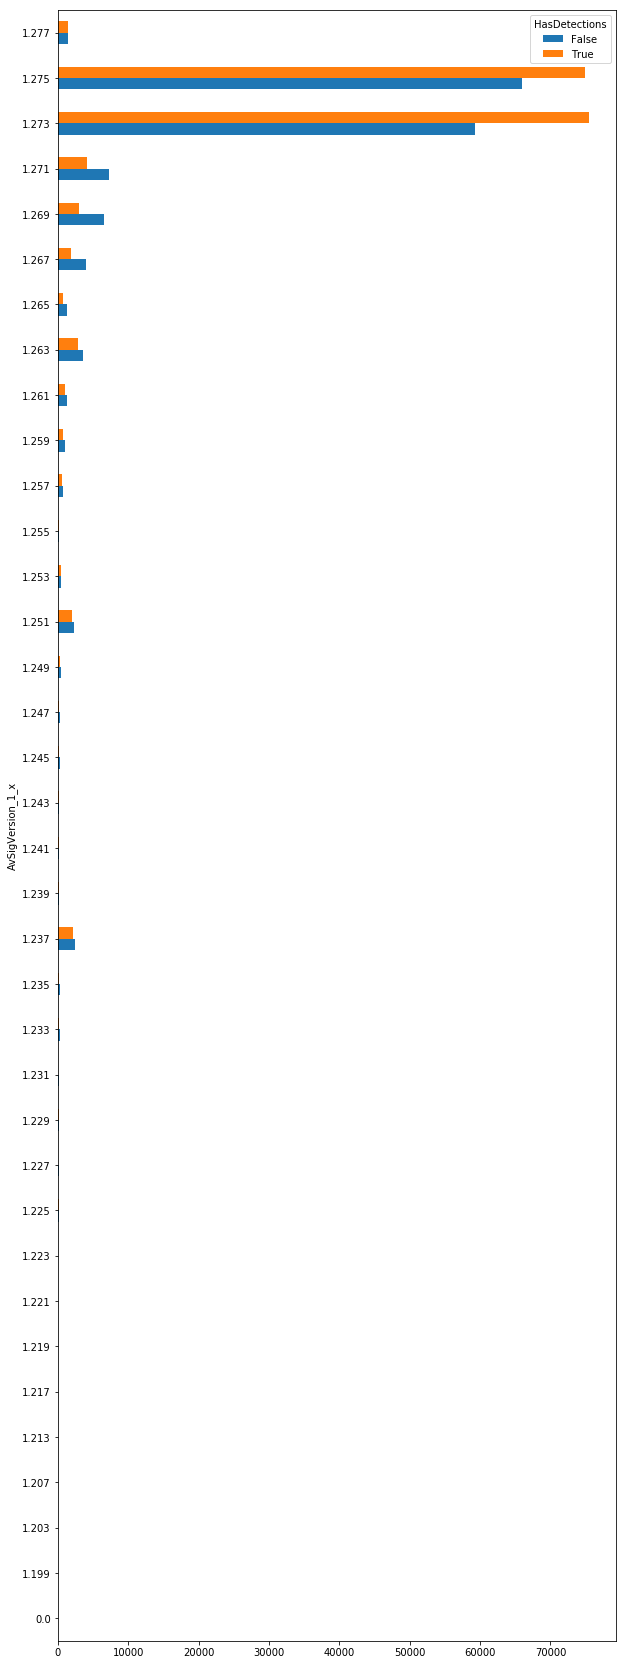

In [229]:
# Extrac 1.XX Release values
AvSigVersion_split = final["AvSigVersion"].str.rsplit(pat=".",expand=True)
final["AvSigVersion_1_x"] = AvSigVersion_split.loc[:,0]+"."+AvSigVersion_split.loc[:,1]
final["AvSigVersion_1_x_xx"] = AvSigVersion_split.loc[:,0]+"."+AvSigVersion_split.loc[:,1]+"."+AvSigVersion_split.loc[:,2].str[:2]

av_sig = pd.crosstab(
    [
        final["AvSigVersion_1_x"]
    ], 
    final.HasDetections.astype(bool)
)

av_sig.plot(kind='barh' , figsize = (10,30))

A more detailed breakdown of **AvSigVersion_1_x** of 1.273 & 2.75 shows that users are not upgrading their builds thus increasing their risk of an attack.

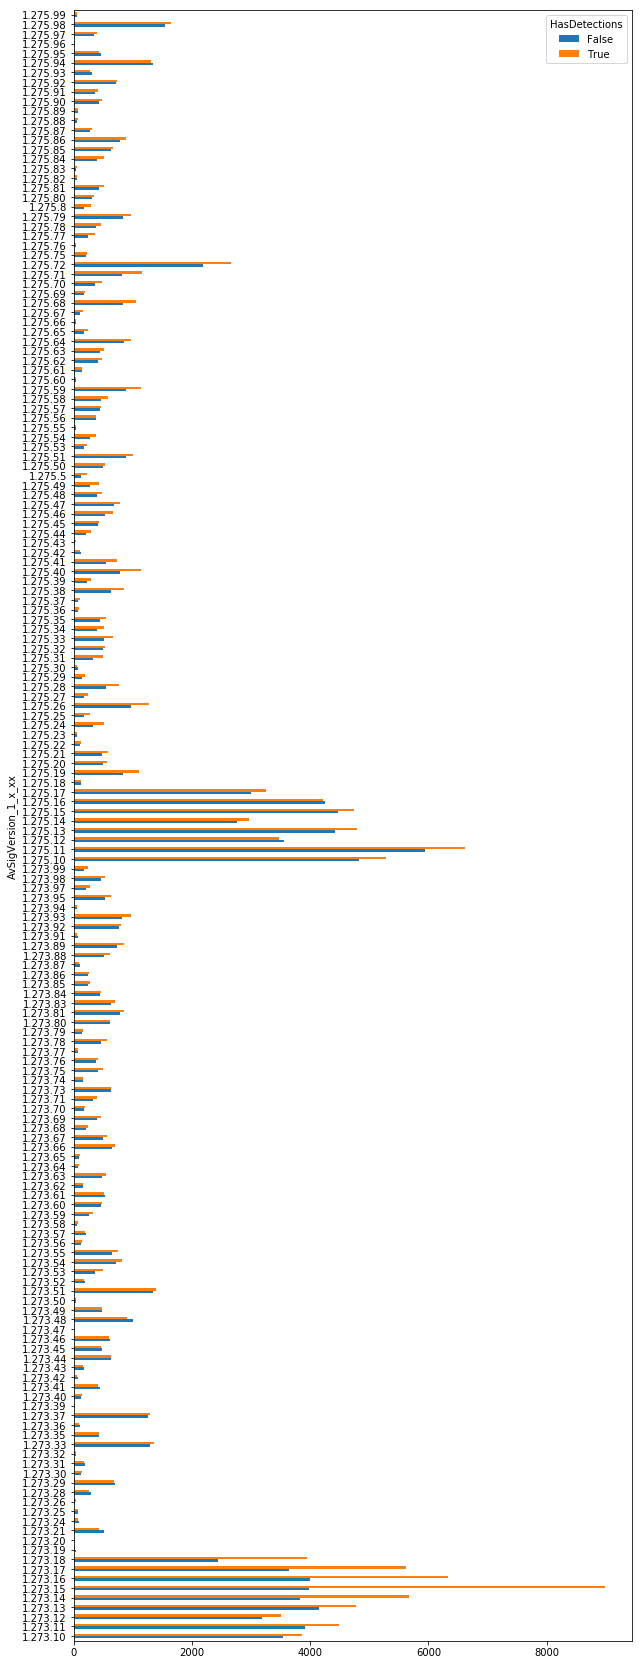

In [230]:
filted = final.AvSigVersion_1_x.isin(['1.275','1.273'])
# filtered = final.AvSigVersion_1_x == "" | final.AvSigVersion_1_x == ""
av_sig = pd.crosstab(
    [
        final.loc[filted,"AvSigVersion_1_x_xx"]
    ], 
    final.HasDetections.astype(bool)
)


av_sig.plot(kind='barh',figsize = (10,30), )

#### AVProductsInstalled

The below plot for shows that **AVProductsInstalled** cateogory value 1 and 2 have different success rate for attacks on the machine.  We do believe this data is ordinal and related to the level of support the AV has or another competetive product. However, Microsoft did not release this information.

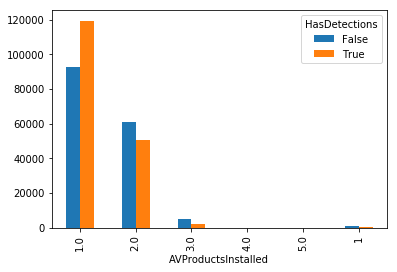

In [231]:
av_enabled = pd.crosstab(
    [
        final["AVProductsInstalled"]
    ], 
    final.HasDetections.astype(bool)
)

av_enabled.plot(kind='bar')# , figsize = (10,30))

#### Smart Screen
Smart screen is a feature offered on Defender that helps block malware through your web browser.  The data provided had 6 categories, however the Defender application only shows "Block", "Warn", or "Off".  We plotted the data again showing the percentage of machines enabling Smart Screen who had dections on their machine for malware.

The chance of a succesful comromise with Malware in Enable mode decreases by about 50% as compared to without SmartScreen enabled.

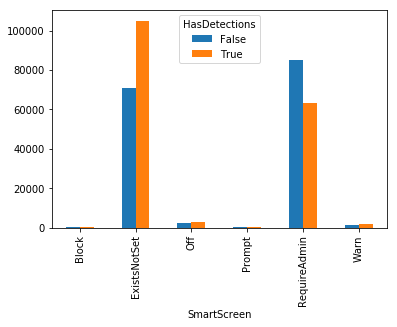

In [232]:
snart_screen = pd.crosstab(
    [
        final["SmartScreen"]
    ], 
    final.HasDetections.astype(bool)
)

snart_screen.plot(kind='bar')# , figsize = (10,30))

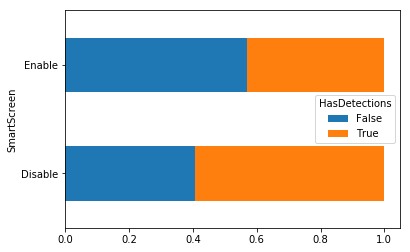

In [233]:
final_save=final.copy()
df_ss=final_save[['SmartScreen','HasDetections']].copy()

df_ss.SmartScreen.replace({"Block":"Enable","ExistsNotSet":"Disable","Off" :"Disable",
                                "Prompt" :"Enable","RequireAdmin":"Enable","Warn":"Enable"},inplace=True)

df_ss.SmartScreen.value_counts()
df_grouped_ss=df_ss.groupby(by=['SmartScreen'])
detection_rate_ss=df_grouped_ss.HasDetections.sum()/df_grouped_ss.HasDetections.count()

ss = pd.crosstab(
    [df_ss["SmartScreen"].astype(object)], 
    df_ss.HasDetections.astype(bool))

ss_rate=ss.div(ss.sum(1).astype(float),axis=0)
ss_rate.plot(kind='barh',stacked=True)

# Revised
### Explore Joint Attributes

#### Hardware Configurations
The resolution features **Census_InternalPrimaryDisplayResolutionHorizontal** and **Census_InternalPrimaryDisplayResolutionVertical** is highly correlated.  In order to adjust for its correlation, we will create a new variable **TotalResolution** by multiplying the 2 values. 

There is also correlation between **Census_SystemVolumeTotalCapacity** and **Census_PrimaryDiskTotalCapacity**.  There also appears to be an outlier where Primary Volume is Less then System Volume.  Since both Disk Capacity values are correlated, we will select **Census_PrimaryDiskTotalCapacity** during our modeling.

As expected as well as a relationship between **Census_ProcessorCoreCount** and **Census_TotalPhysicalRAM**.  The majority of the data is exteremly right skewed therefore the data needed to be log transformed.  Addtionaly, the visual showing of "zebra" stripes indicate this data may be better suited as a categorical variable.

In [13]:
#from pandas.plotting import scatter_matrix
# scatter_matrix(final[cols_numerical], alpha=0.2, figsize=(30,30), diagonal='kde')


import seaborn as sns; sns.set(style="ticks", color_codes=True)

# df = (final[cols_numerical]-final[cols_numerical].mean())/(final[cols_numerical].std())

# display(scl_numericals.describe())

df = final[np.append("Census_MDC2FormFactor",cols_numerical)].copy()
# df["Census_MDC2FormFactor"] = final["Census_MDC2FormFactor"]

# # Apply Log Transformation
df["Census_SystemVolumeTotalCapacity"] = np.log(df.Census_SystemVolumeTotalCapacity)
df["Census_TotalPhysicalRAM"] = np.log(df.Census_TotalPhysicalRAM)
df["Census_PrimaryDiskTotalCapacity"] = np.log(df.Census_PrimaryDiskTotalCapacity)

# Update Column Names
df.columns = [col.split("_",1)[1] for col in df.columns]

/Users/christopherballenger/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


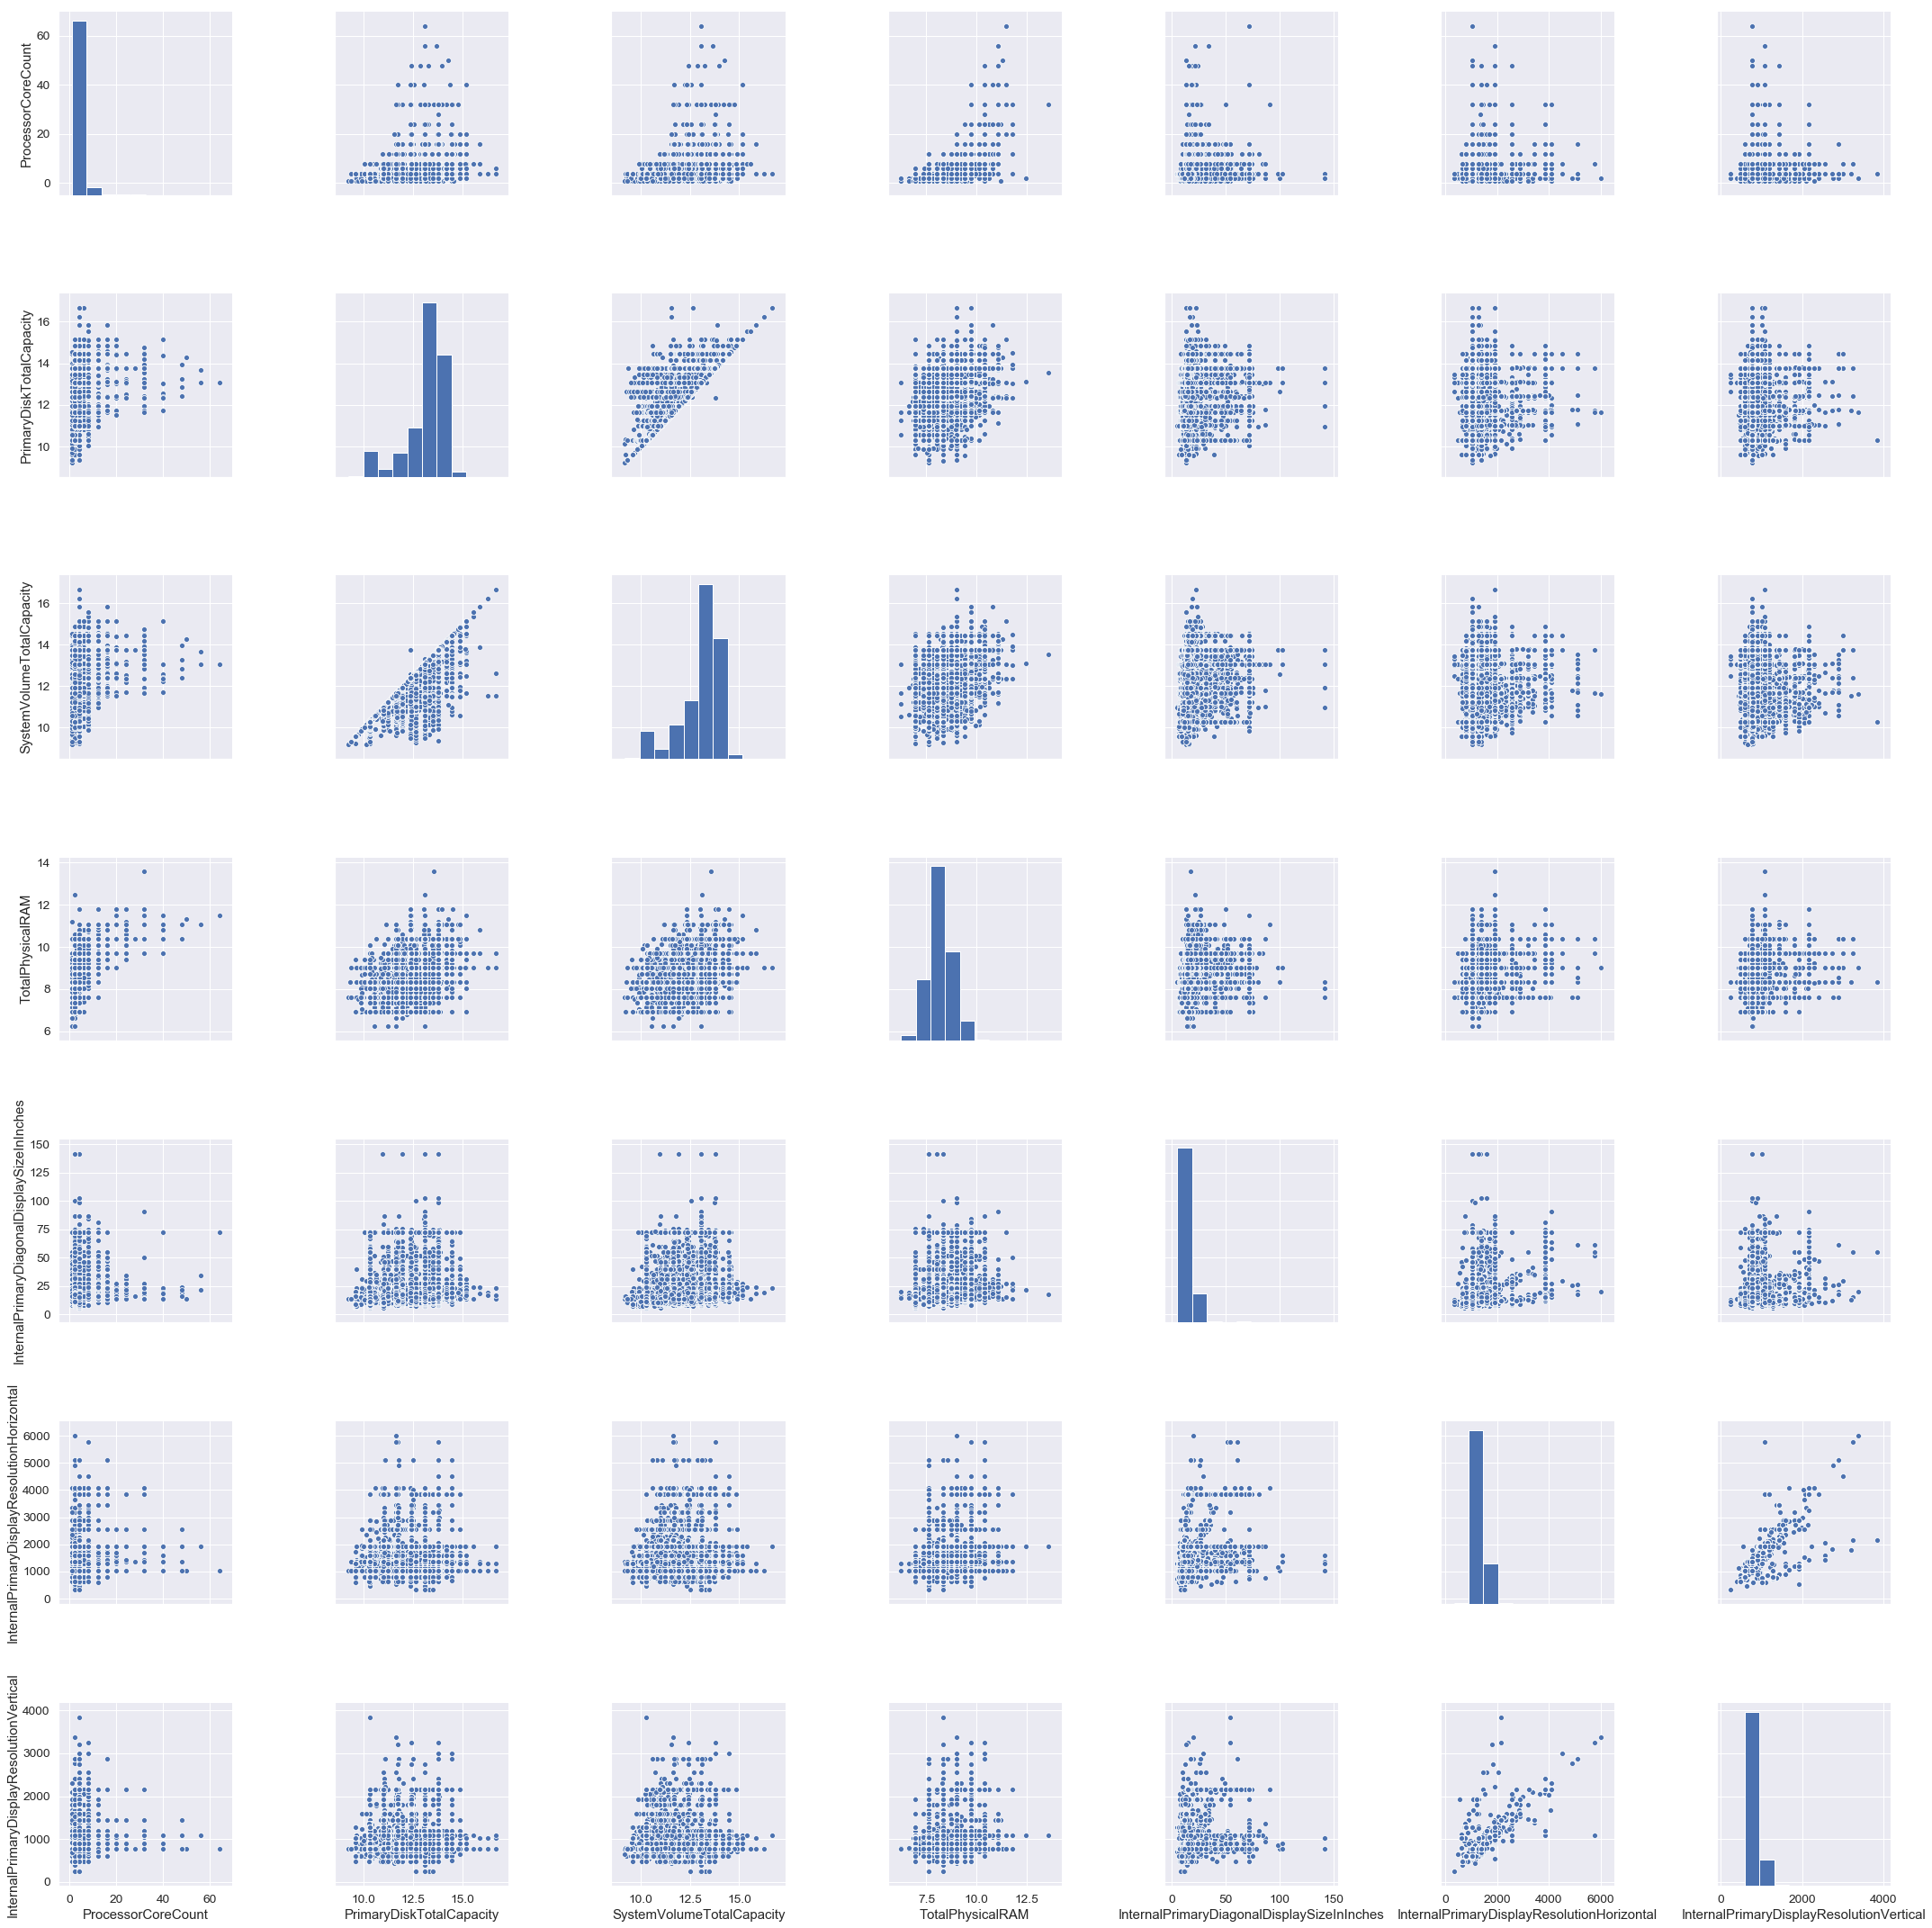

In [45]:
sns.set(font_scale=1.25)
g = sns.pairplot(df,height=2,aspect=1)
g.fig.set_figheight(30)
g.fig.set_figwidth(30)
plt.tight_layout()
plt.show()

In [ ]:
df["TotalDisplayResolution"] = df.InternalPrimaryDisplayResolutionHorizontal * df.InternalPrimaryDisplayResolutionVertical
del df["InternalPrimaryDisplayResolutionHorizontal"]
del df["InternalPrimaryDisplayResolutionVertical"]
del df["SystemVolumeTotalCapacity"]

Below is a heatmap including the new variables.  We are able to confirm our relationship with Processor Cores and Physical memory.  We will chose to use both values as they explain different things on a machine.

There also appears to be no additional values that are similar in values and correlated.

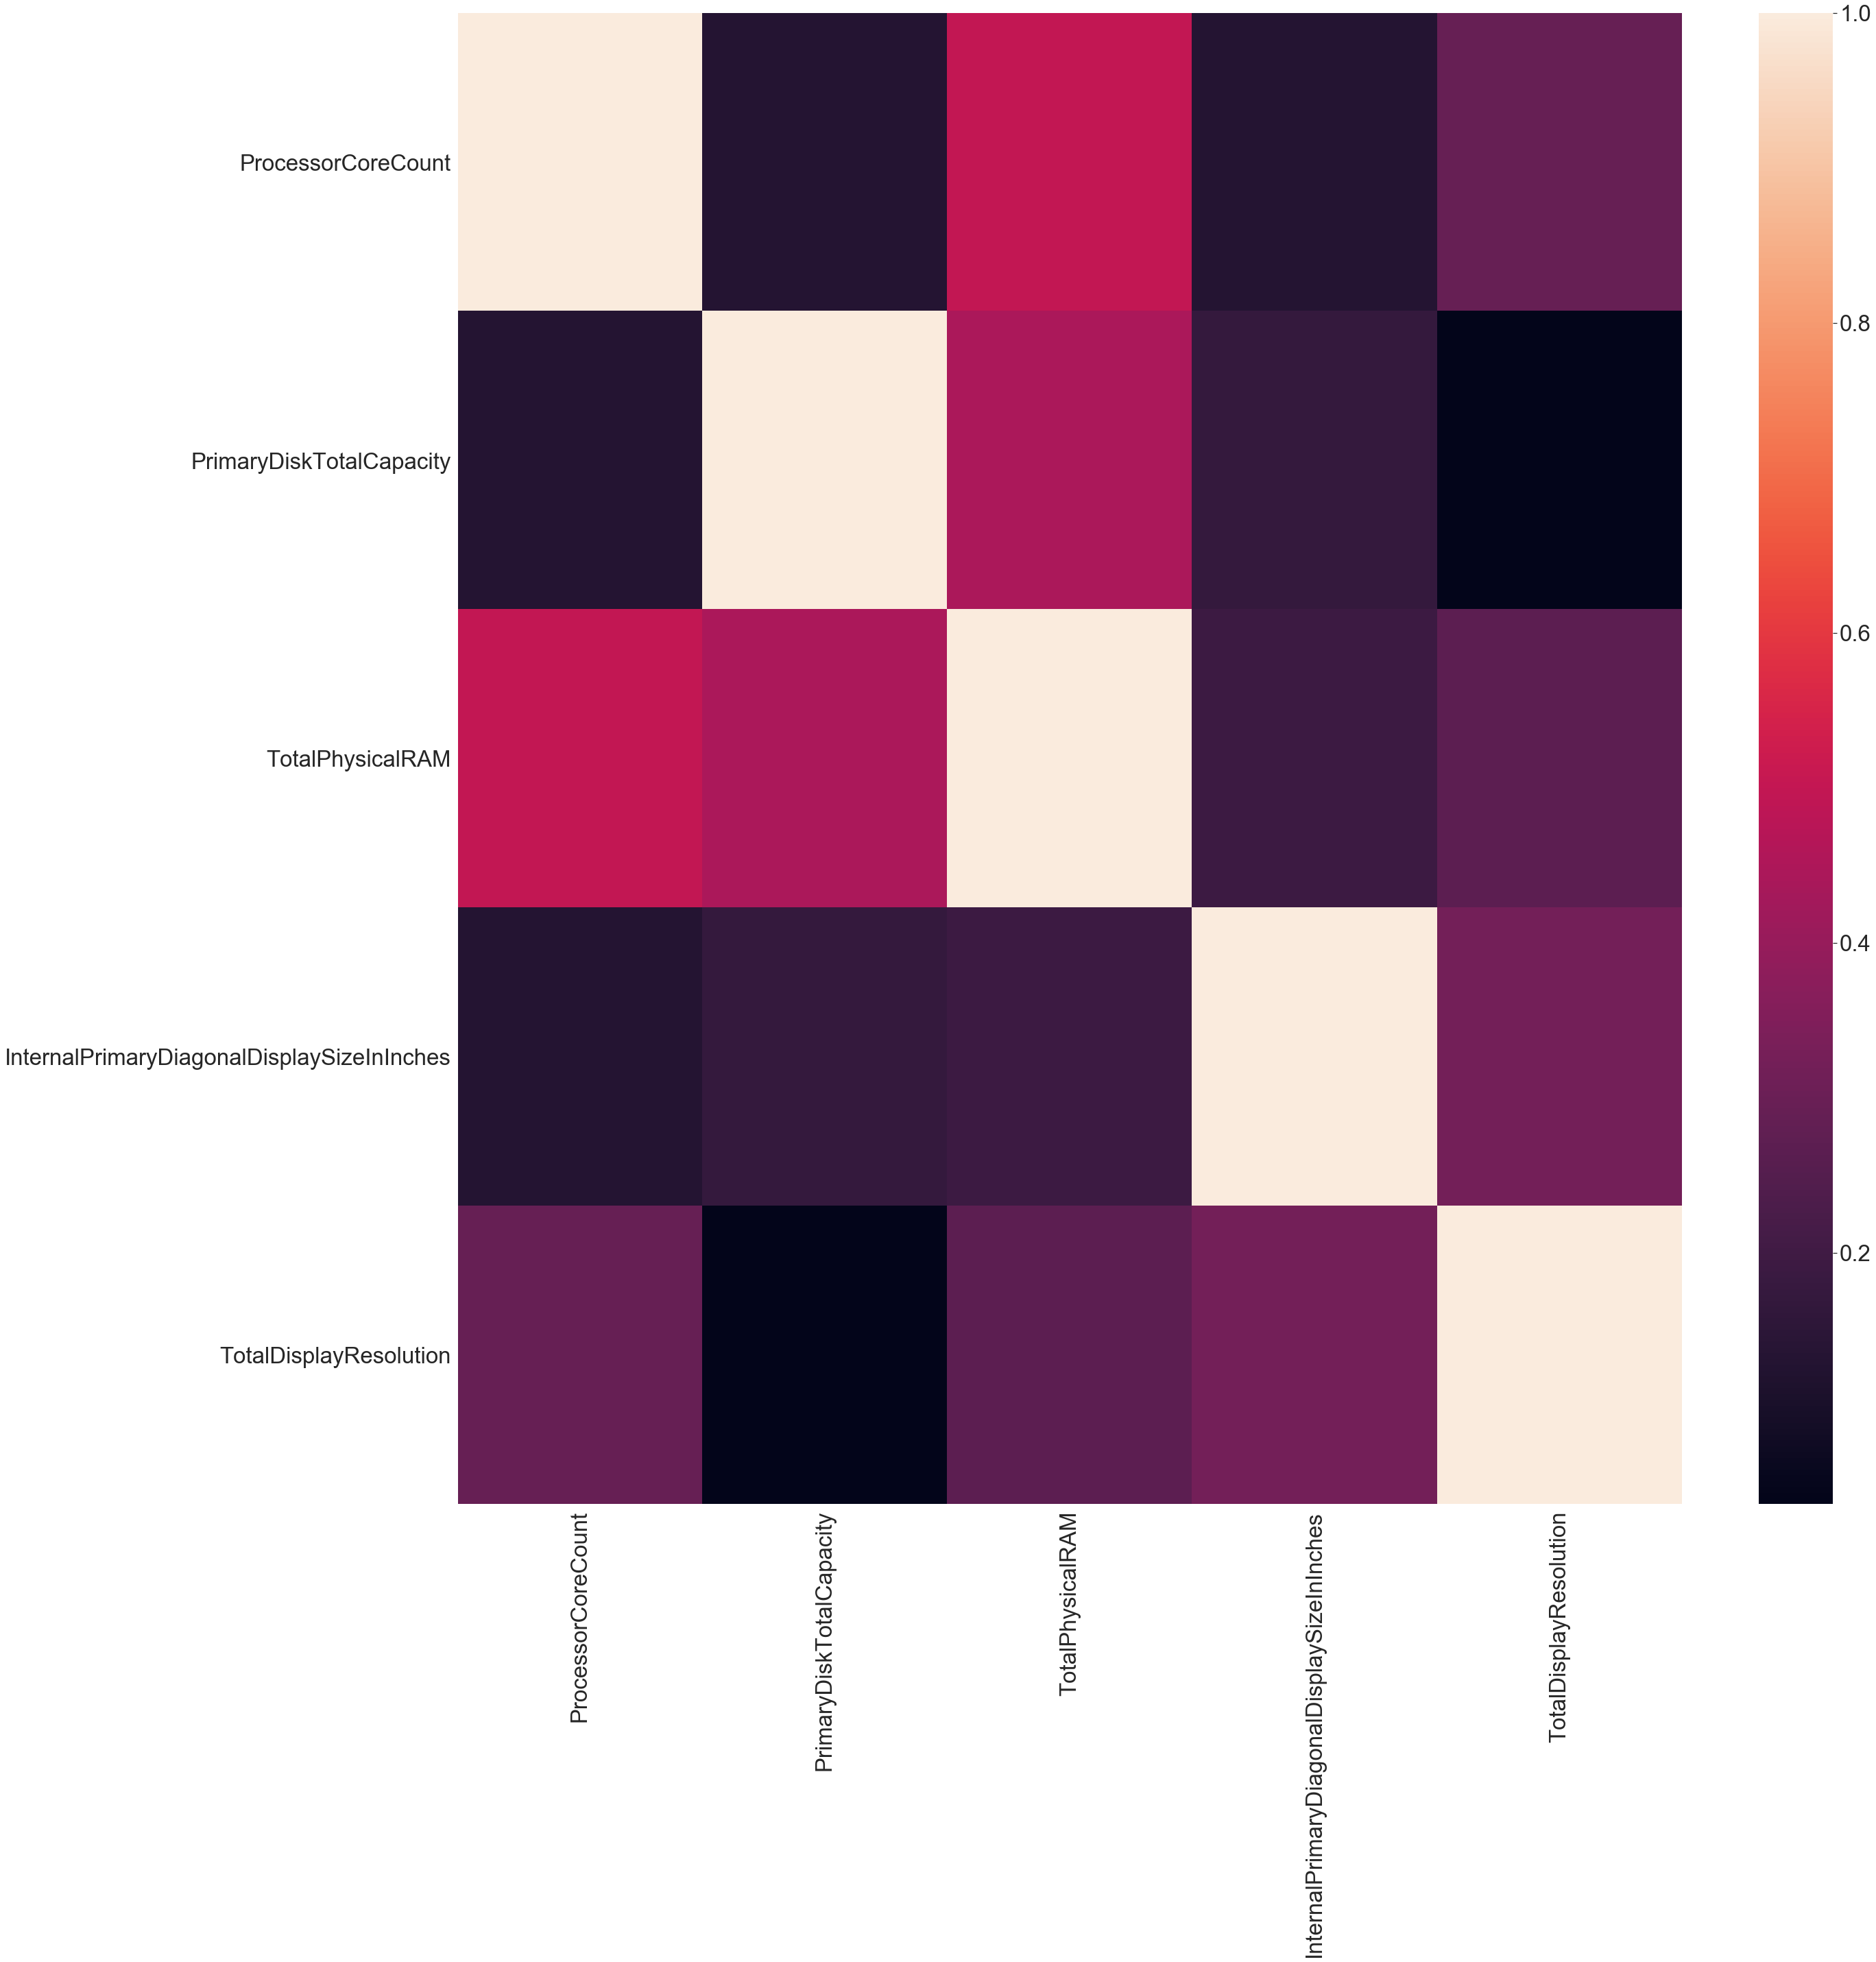

In [15]:
sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), ax=ax)
plt.show()

#### AVEnabled and AVProductInstalled
There are several fields that are cateogirized as 0,1,2, etc. but we are not sure what this data means.  In order to understand these fields we created a heatmap between different features (excluding builds) to determine if there could be a relationship.

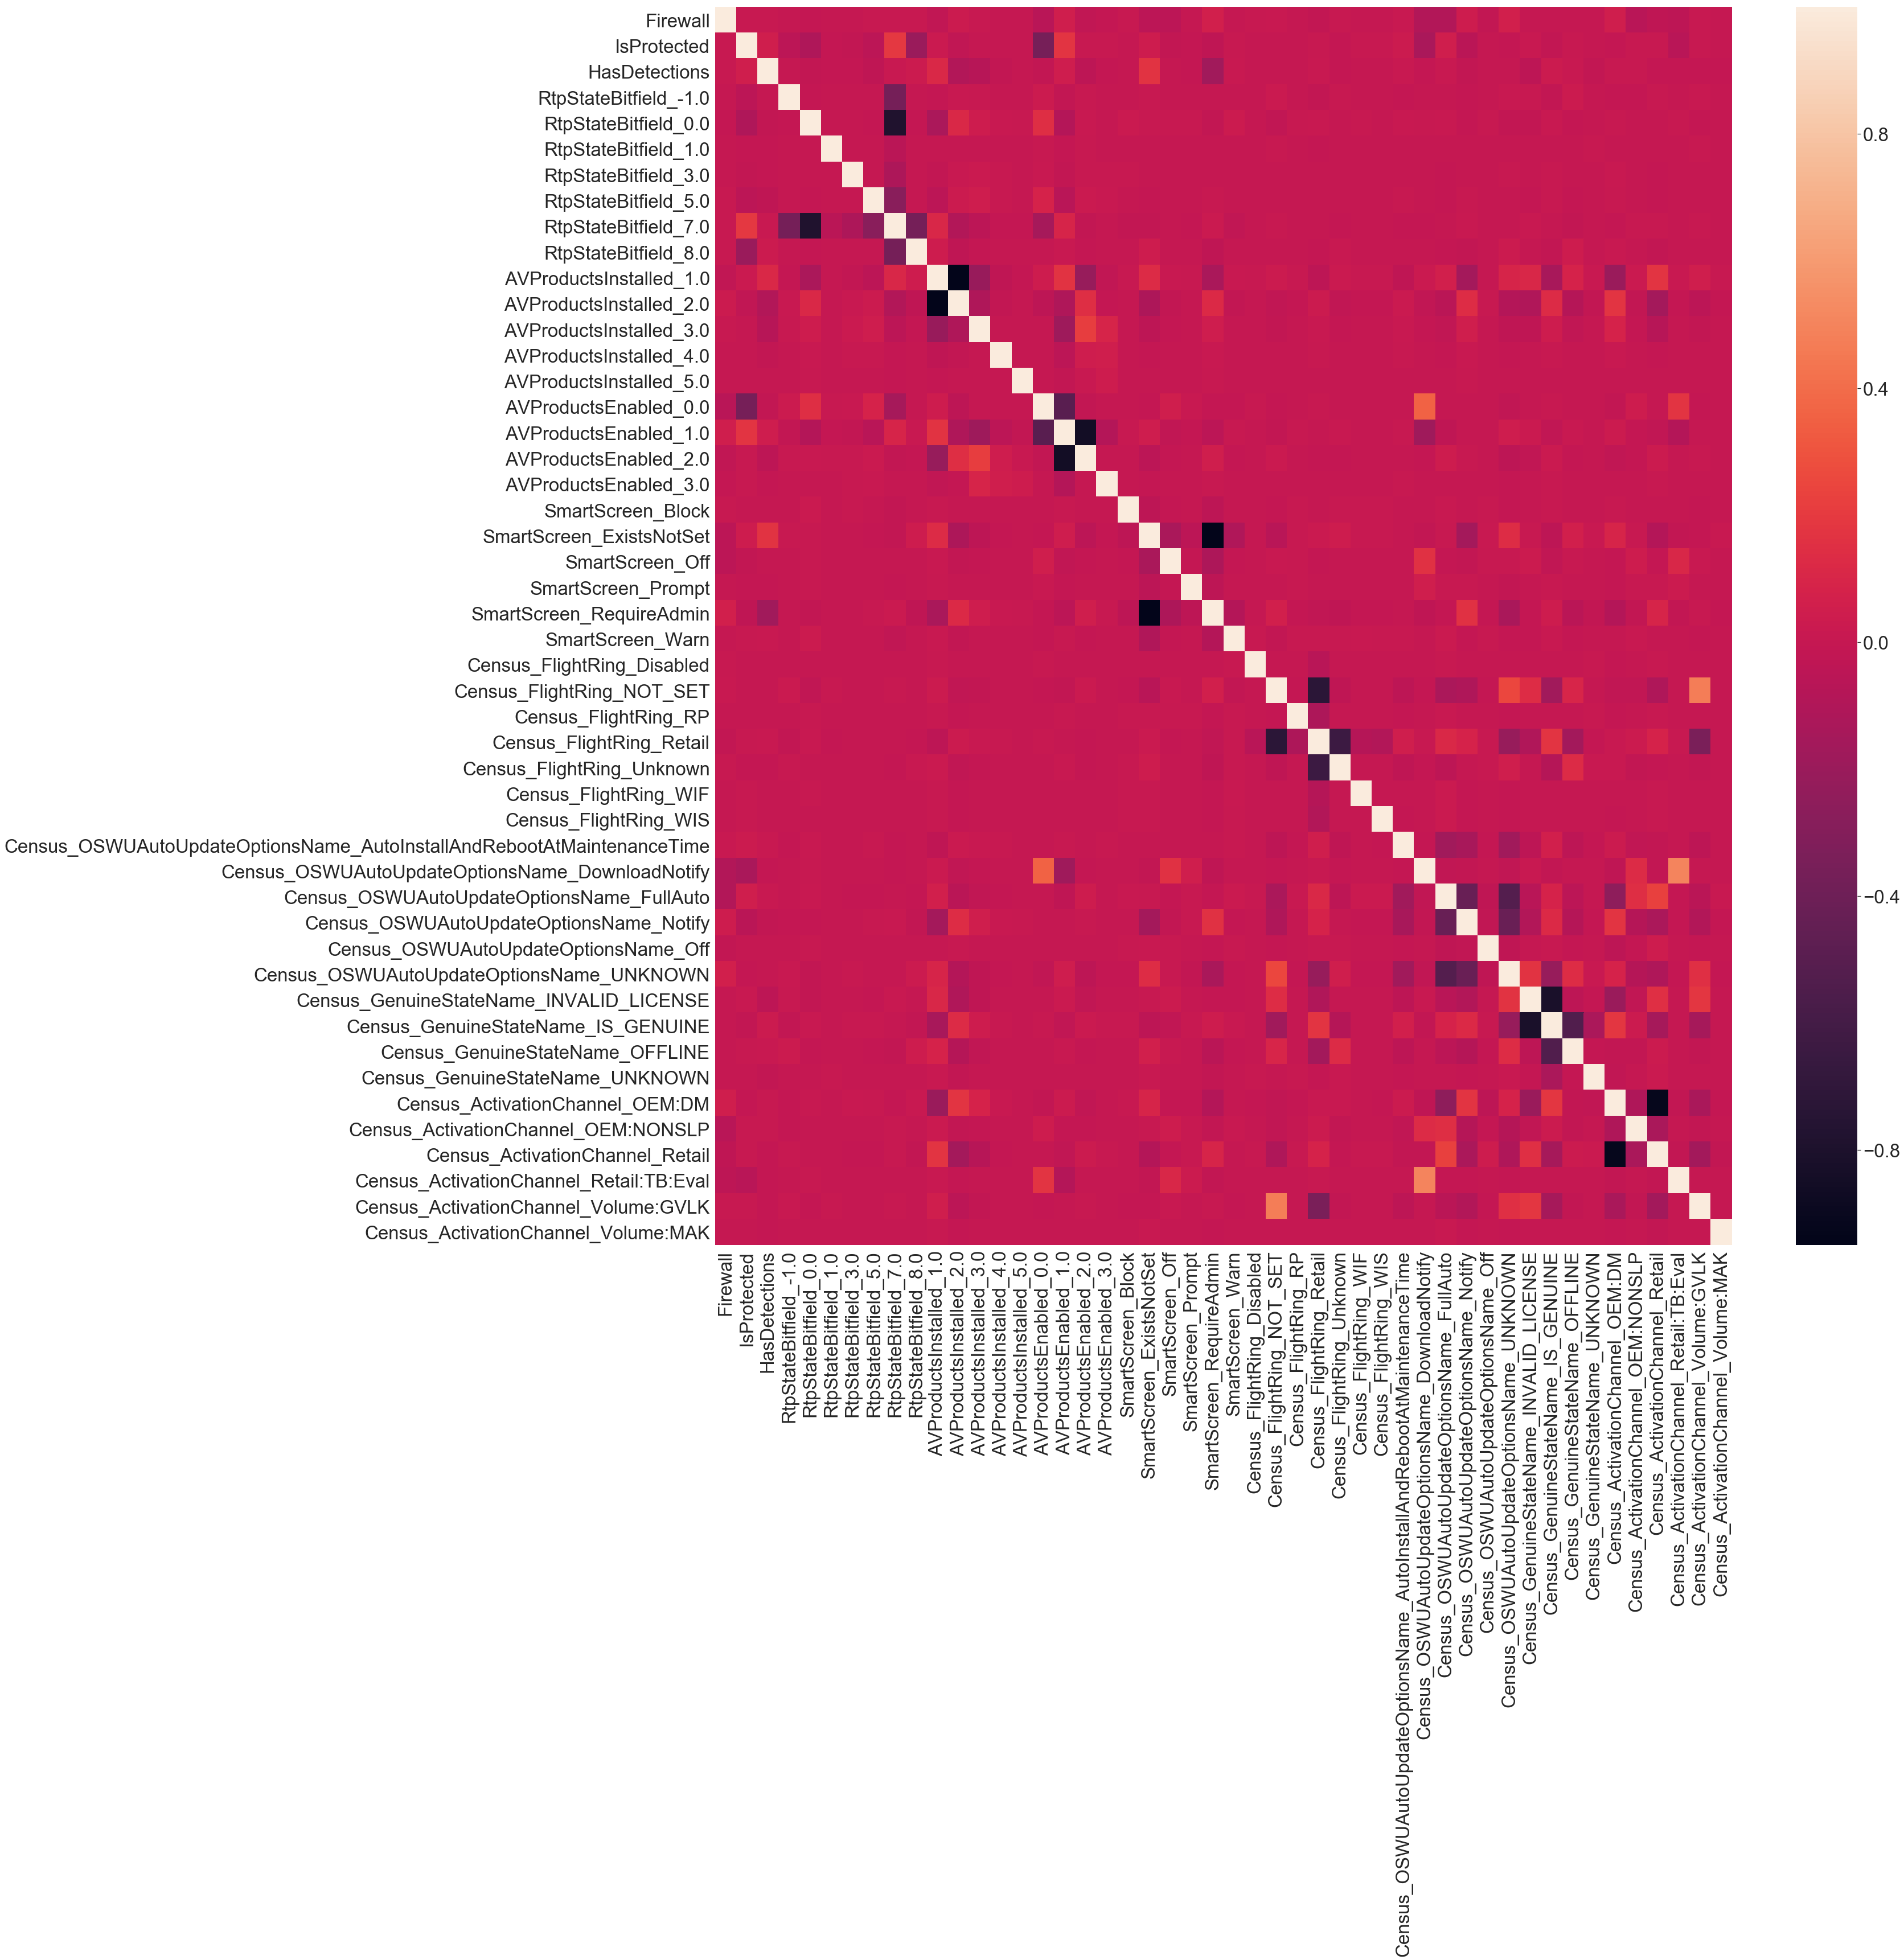

In [61]:
# Create Dummy Variables
RtpStateBitfield = pd.get_dummies(final["RtpStateBitfield"],prefix="RtpStateBitfield")
AVProductsInstalled = pd.get_dummies(final["AVProductsInstalled"],prefix="AVProductsInstalled")
AVProductsEnabled = pd.get_dummies(final["AVProductsEnabled"],prefix="AVProductsEnabled")
SmartScreen = pd.get_dummies(final["SmartScreen"],prefix="SmartScreen")
Census_FlightRing = pd.get_dummies(final["Census_FlightRing"],prefix="Census_FlightRing")
Census_OSWUAutoUpdateOptionsName = pd.get_dummies(final["Census_OSWUAutoUpdateOptionsName"],prefix="Census_OSWUAutoUpdateOptionsName")
Census_GenuineStateName = pd.get_dummies(final["Census_GenuineStateName"],prefix="Census_GenuineStateName")
Census_ActivationChannel = pd.get_dummies(final["Census_ActivationChannel"],prefix="Census_ActivationChannel")

df = pd.concat(
    (
        final[["Firewall","IsProtected","HasDetections"]],
        RtpStateBitfield,
        AVProductsInstalled,
        AVProductsEnabled,
        SmartScreen,
        Census_FlightRing,
        Census_OSWUAutoUpdateOptionsName,
        Census_GenuineStateName,
        Census_ActivationChannel
    ), axis=1
)

sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), ax=ax)
plt.show()

From our heatmap we can see that **IsProtected** has negative correlation to the **AVEnabled_0** possible indicating that the value 0 in the **AVEnabled** represents the machine does not have an Antivirus enabled.  We can see that **AvProductsInstalled_1.0** has positive correlation with **AVEnabled_1.0** and negative correlation with **AVEnabled_2.0**.  However **AvProductsInstalled_2.0** and **AvProductsInstalled_3.0** has positive correlation with **AVEnabled_2.0**.

Another similarity in the **AVProductsInstalled** is its relationship with **Census_ActivationChannel**.  **AVProductsInstalled** value <i>1</i> has a relationship with <i>Retaion</i> value, while category of <i>2</i> and <i>3</i> has a relationship of <i>OEM</i>.

We also learned the **AVEnabled** category value of <i>0</i> has a relationship with <i>Retail Eval</i> and a <i>DoNotNotify</i>, indicating that Defender may not be shiped with trail versions of Windows.


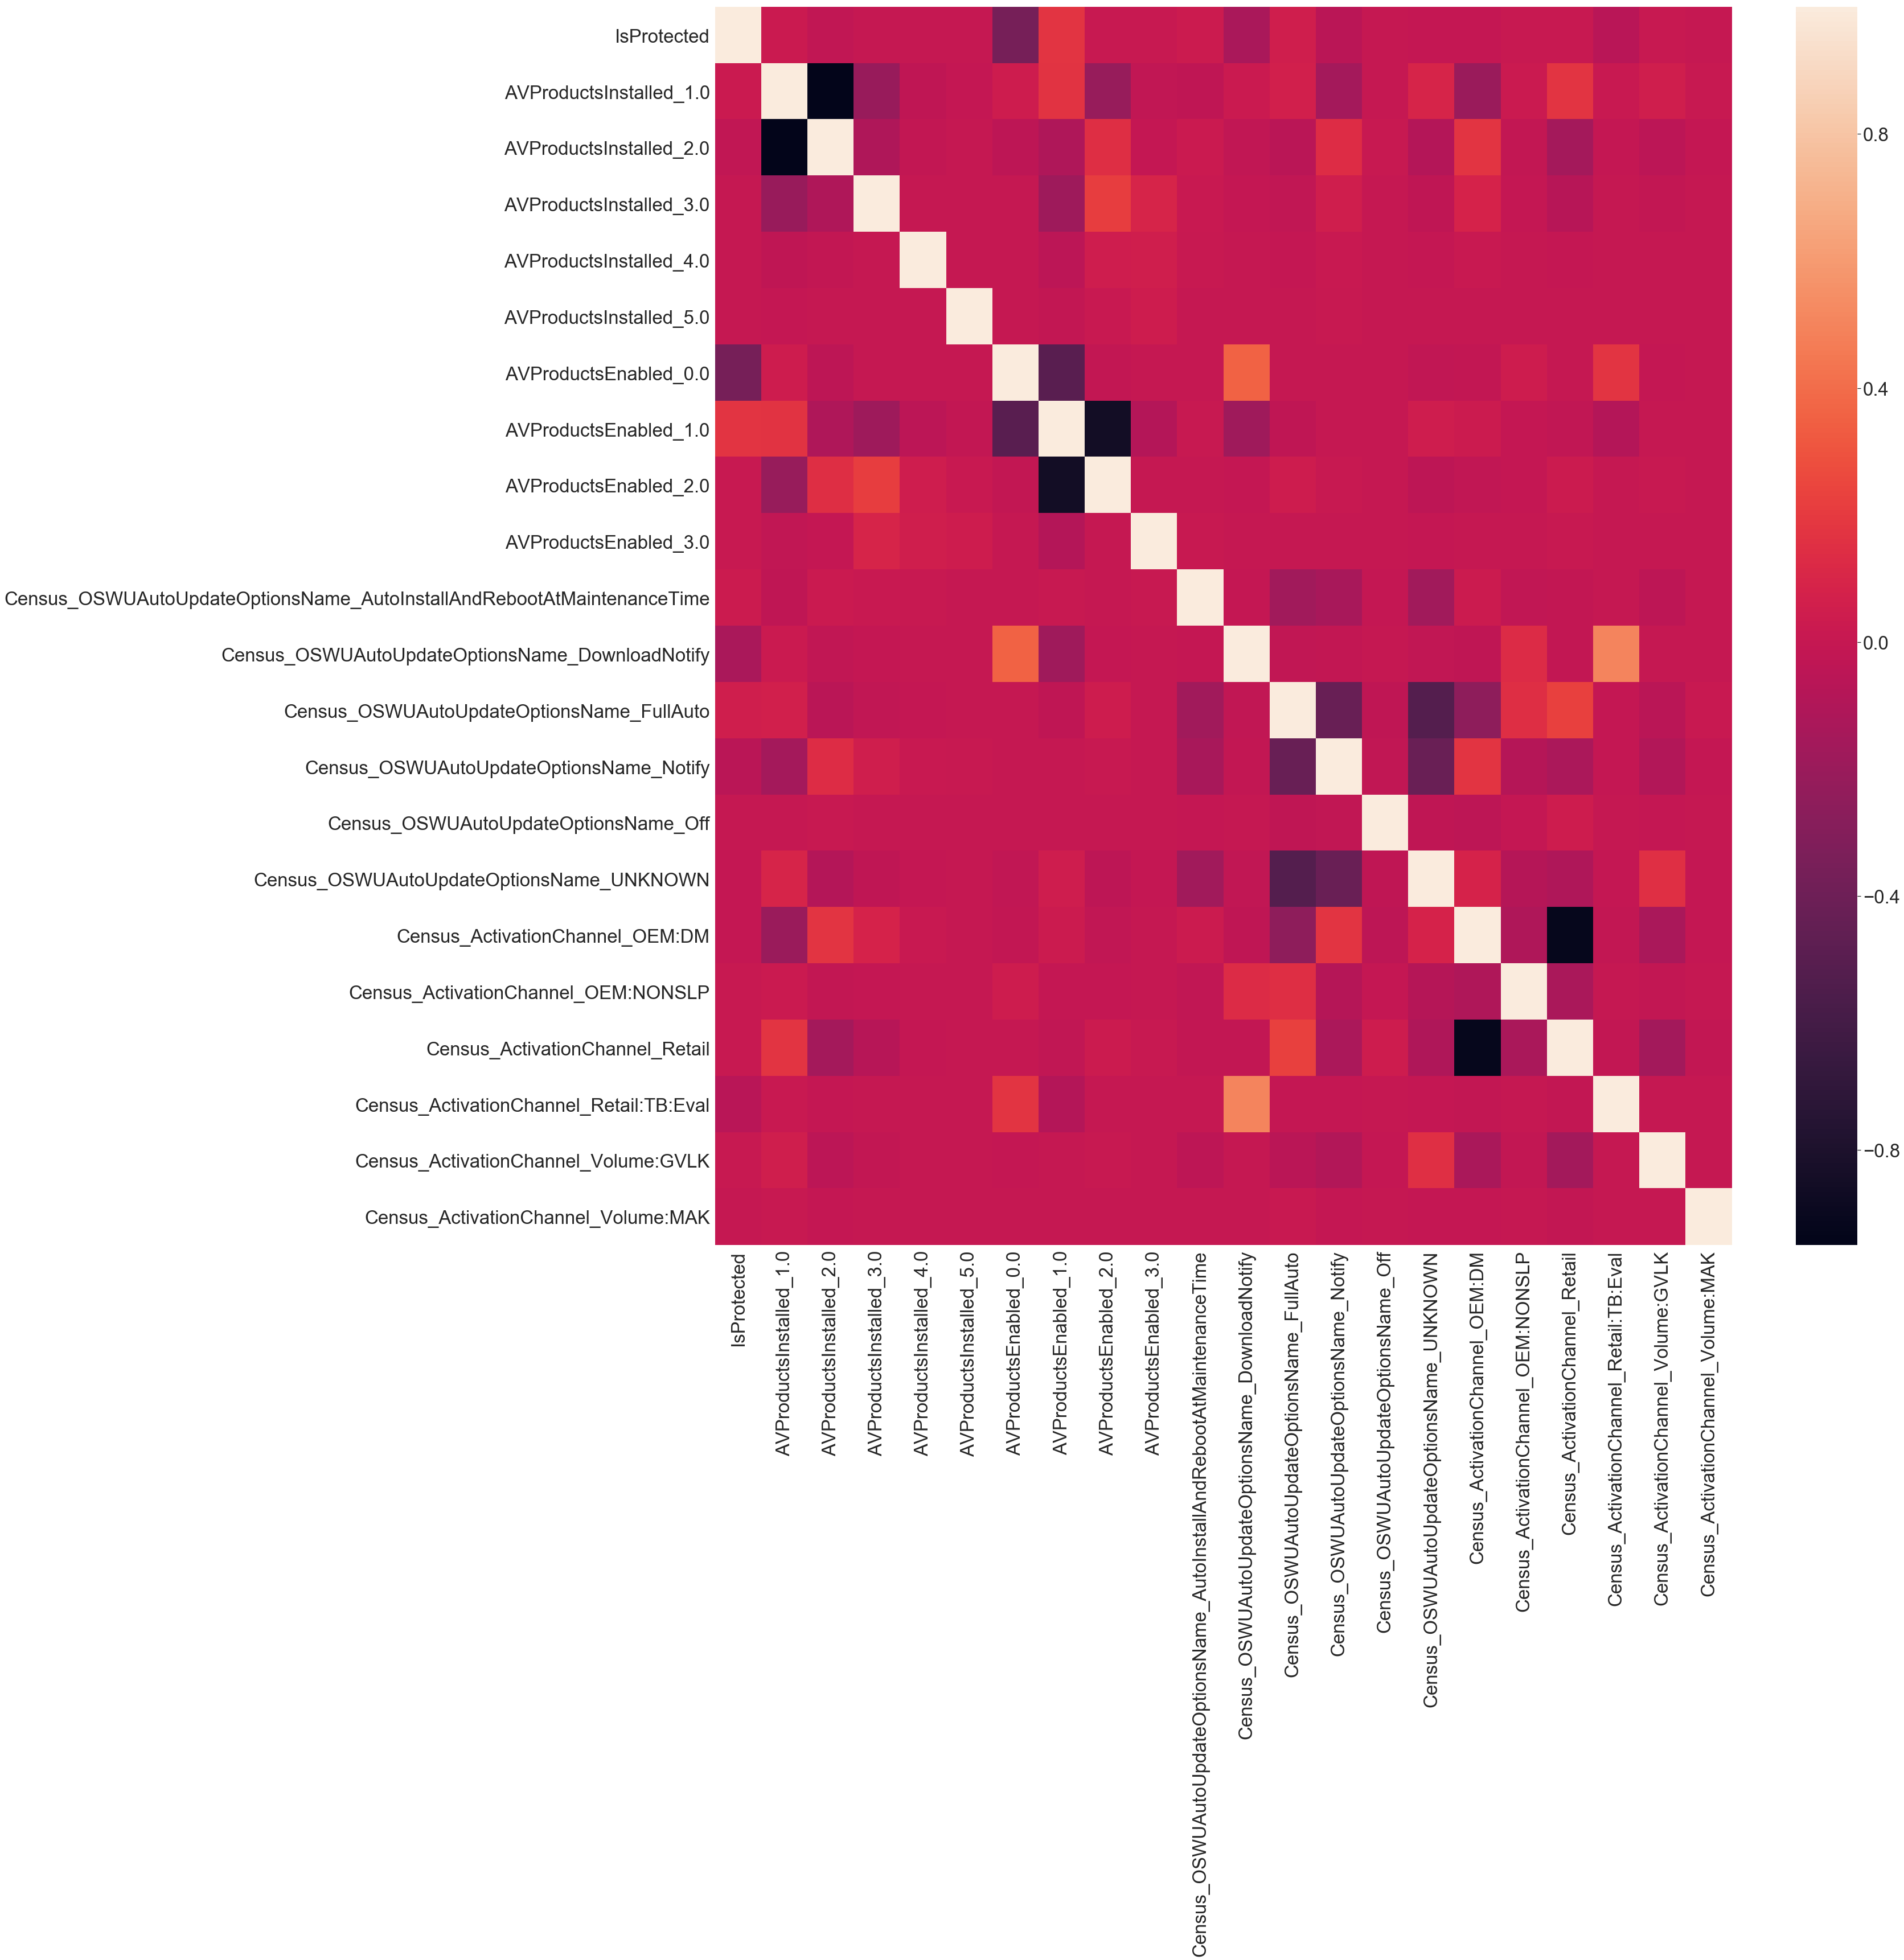

In [64]:
df = pd.concat(
    (
        final[["IsProtected"]],
        AVProductsInstalled,
        AVProductsEnabled,
        Census_OSWUAutoUpdateOptionsName,
        Census_ActivationChannel
    ), axis=1
)

sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), ax=ax)
plt.show()


##### AV Builds
The below heatmap shows us that **EngineVersion** is highly correlated with **AVSigVersion**.  Through our reserch, we learned that **AVSigVersion** has the latest versions of malware definitions.  During our building of the model, we will favor **AVSigVersion** instead of **EngineVersion**.

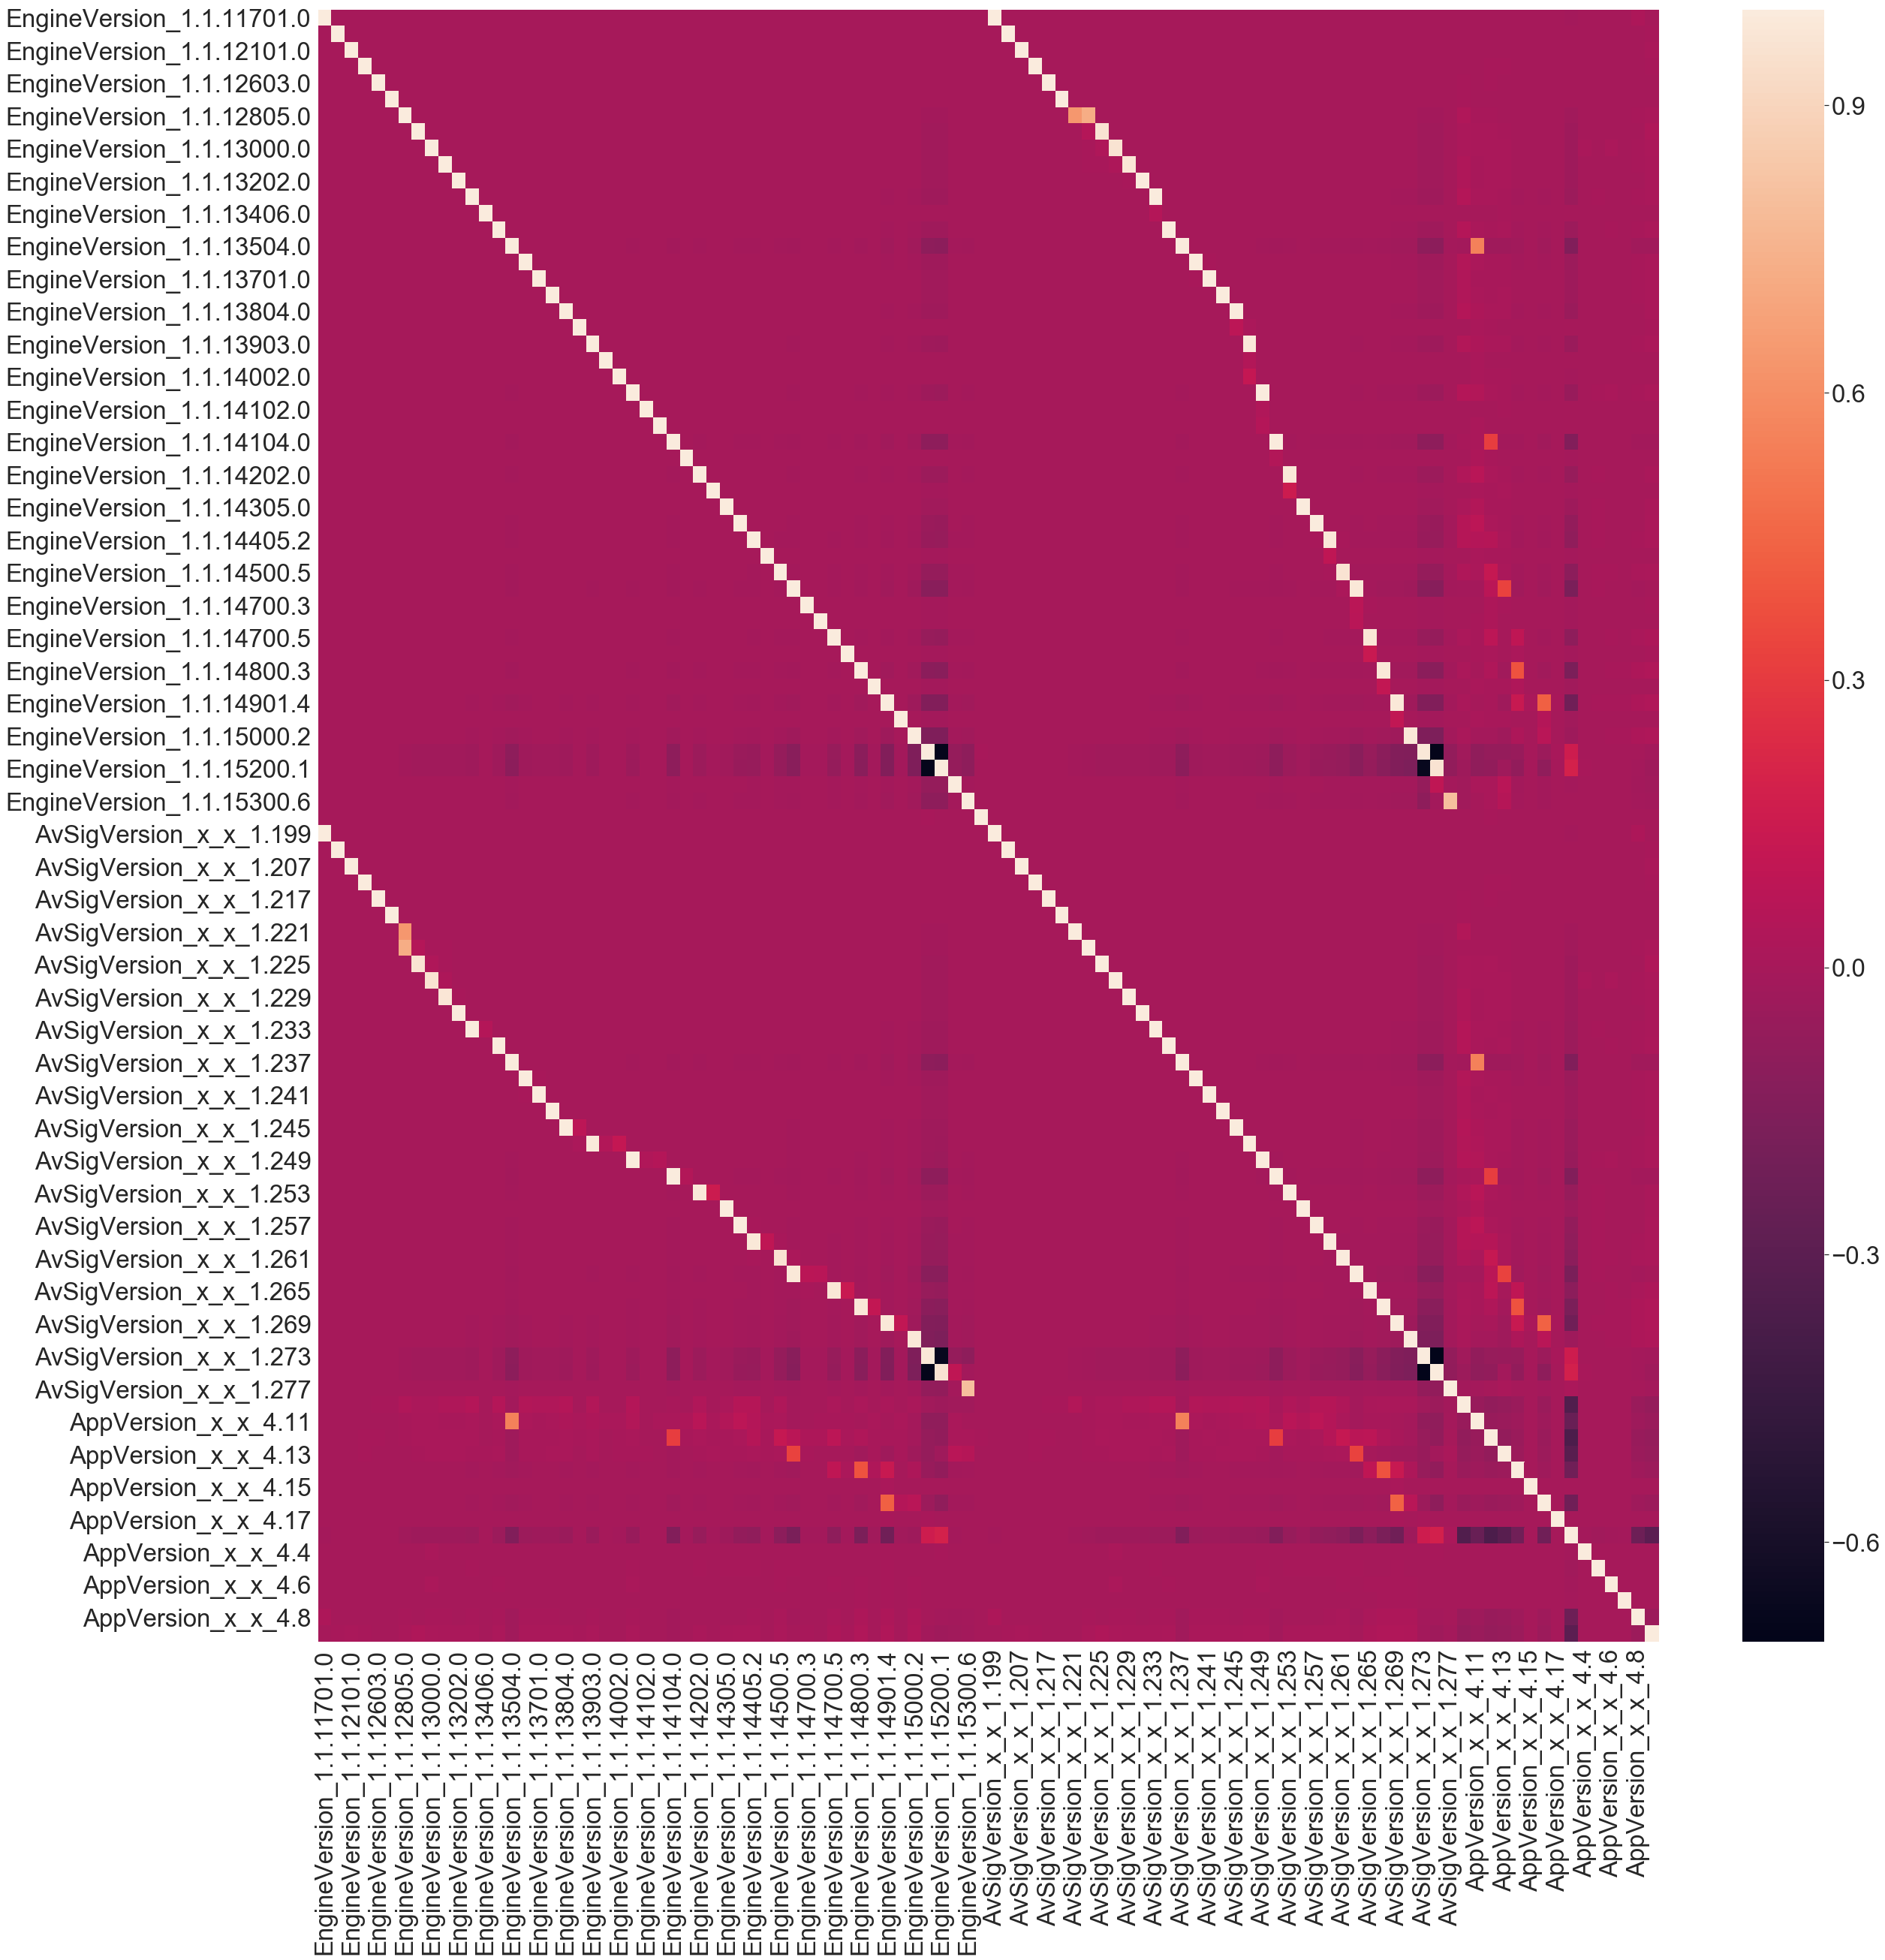

In [31]:
AppVersion_split = final["AppVersion"].str.rsplit(pat=".",expand=True)
final["AppVersion_x_x"] = AppVersion_split.loc[:,0]+"."+AppVersion_split.loc[:,1]#+"."+AppVersion_split.loc[:,2]

AvSigVersion_split = final["AvSigVersion"].str.rsplit(pat=".",expand=True)
final["AvSigVersion_x_x"] = AvSigVersion_split.loc[:,0]+"."+AvSigVersion_split.loc[:,1]

EngineVersion = pd.get_dummies(final["EngineVersion"],prefix="EngineVersion")
AppVersion_x_x = pd.get_dummies(final["AppVersion_x_x"],prefix="AppVersion_x_x")
AvSigVersion_x_x = pd.get_dummies(final["AvSigVersion_x_x"],prefix="AvSigVersion_x_x")


df = pd.concat(
    (
        EngineVersion,
        AvSigVersion_x_x,
        AppVersion_x_x
    ), axis=1
)

sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), ax=ax)
plt.show()

### Explore Attributes and Class

#### Diskspace & Memory compared to Devices

Further details from the boxplots, the density of Detections for Diskspace and Memory was analyzed..  In the violin plot for <b>Census_TotalPhysicalRAM</b> . We can visually see that Median server, as the memory increases there is a higher likely hood of vulnerability.  The remaining servers, with the exception of Large (low detections), memory is not a high factor between detections. The feature <b>Census_PrimaryDiskTotalCapacity</b> also shows a similar pattern, where if you are a server with more diskspace you are more likely to be attacked by malware.

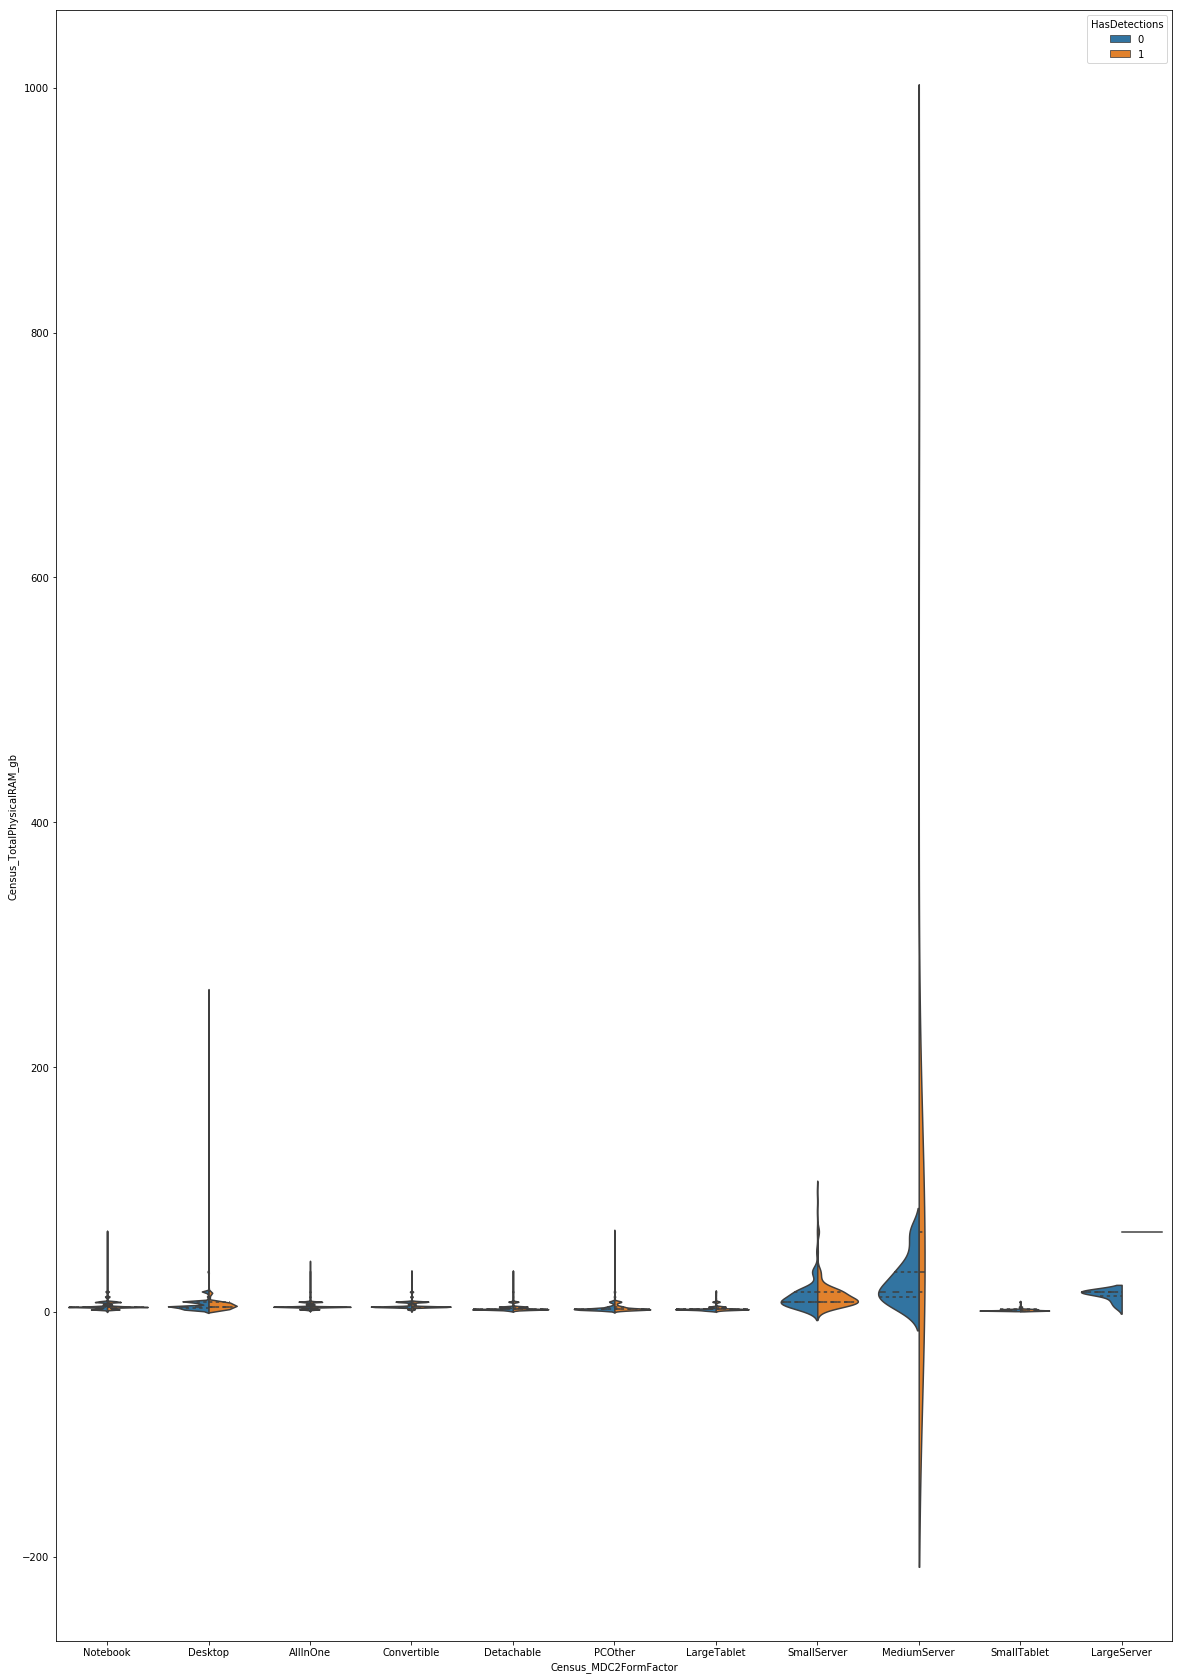

In [235]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(20,30))

final["Census_TotalPhysicalRAM_gb"] = final.Census_TotalPhysicalRAM / 1000

sns.violinplot(x="Census_MDC2FormFactor", y="Census_TotalPhysicalRAM_gb", hue="HasDetections", data=final, 
               split=True, inner="quart")

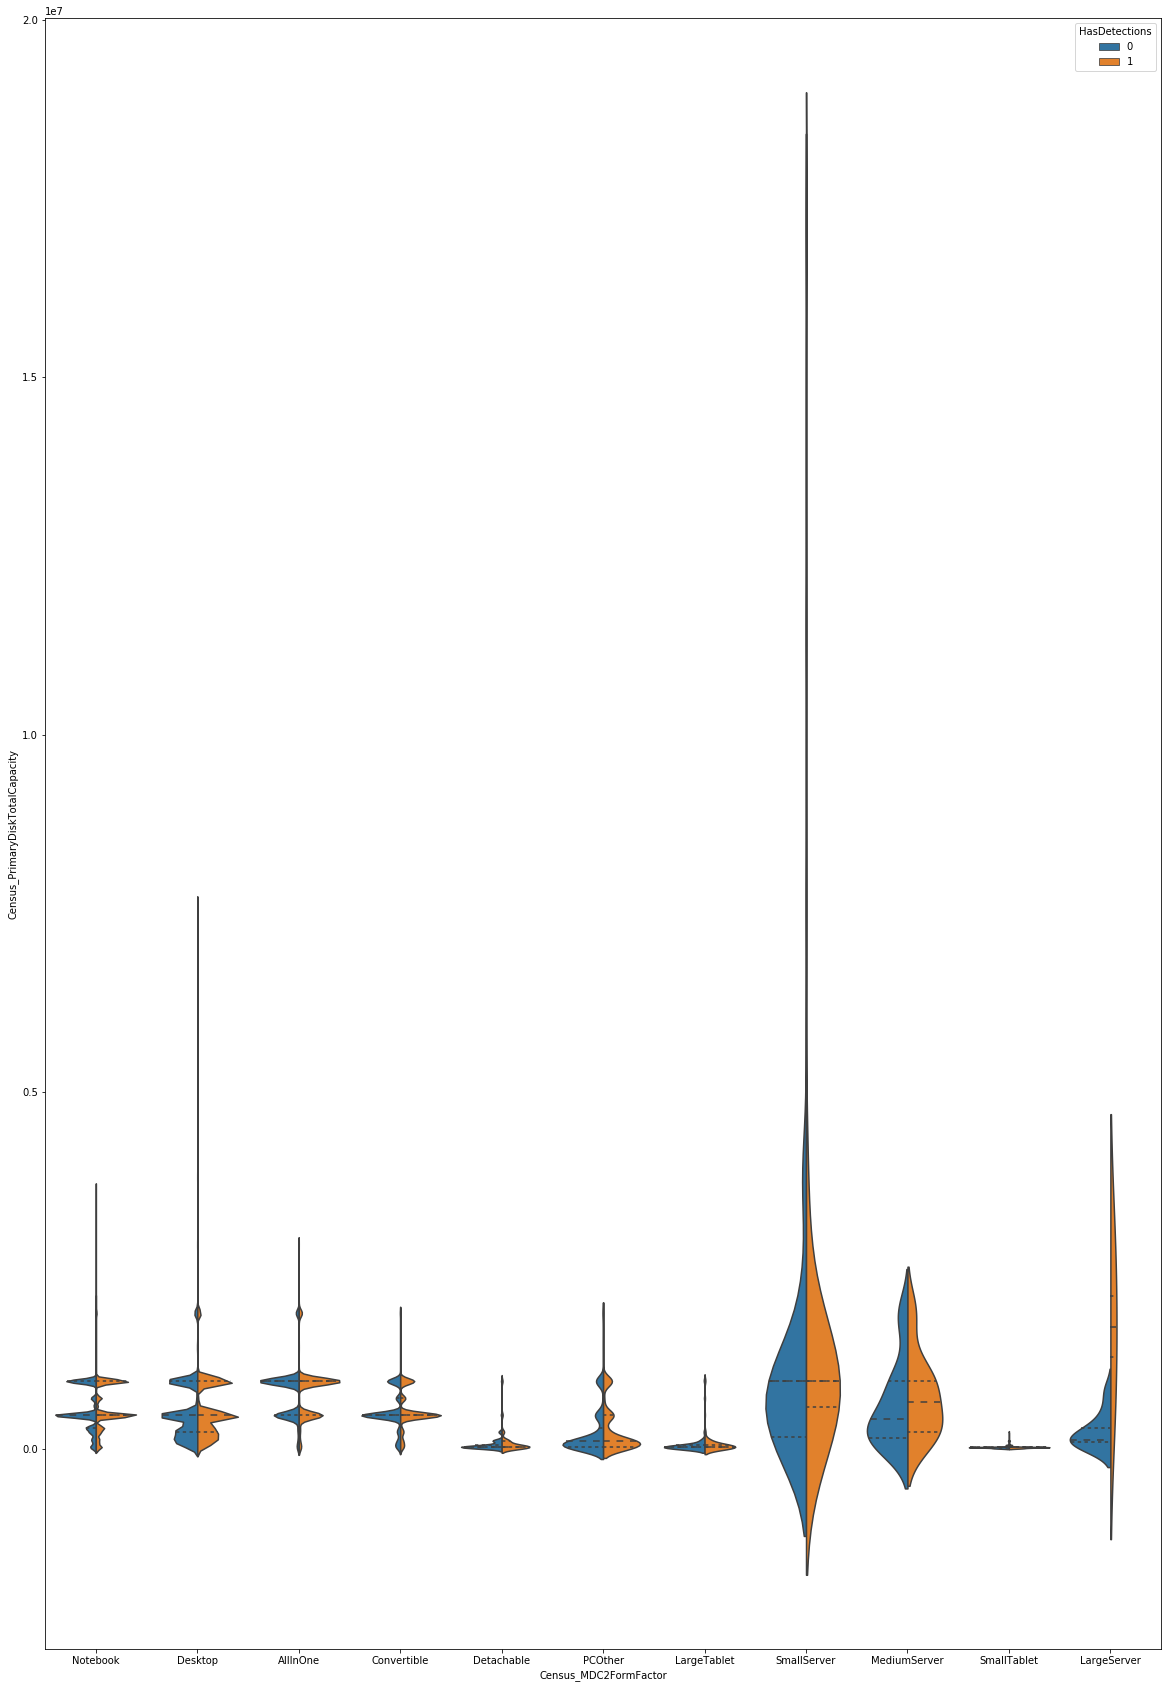

In [236]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(20,30))
sns.violinplot(x="Census_MDC2FormFactor", y="Census_PrimaryDiskTotalCapacity", hue="HasDetections", data=final, 
               split=True, inner="quart")

#### Defender Version Details
While researching different builds of Defender, we learned there is the version of the actual Application, **AppVersion**, along with definition version to detect Malware, **AvSigVersion**, and Engine Version **EngineVersion**.  In order to understand its relationship between detections, we compared combinations of different versions.  Visually the 2 largest groups of version combinations has the make chance for an attack.  This may be an indication that attackers know what the adoption rate for versions and targeting these versions.

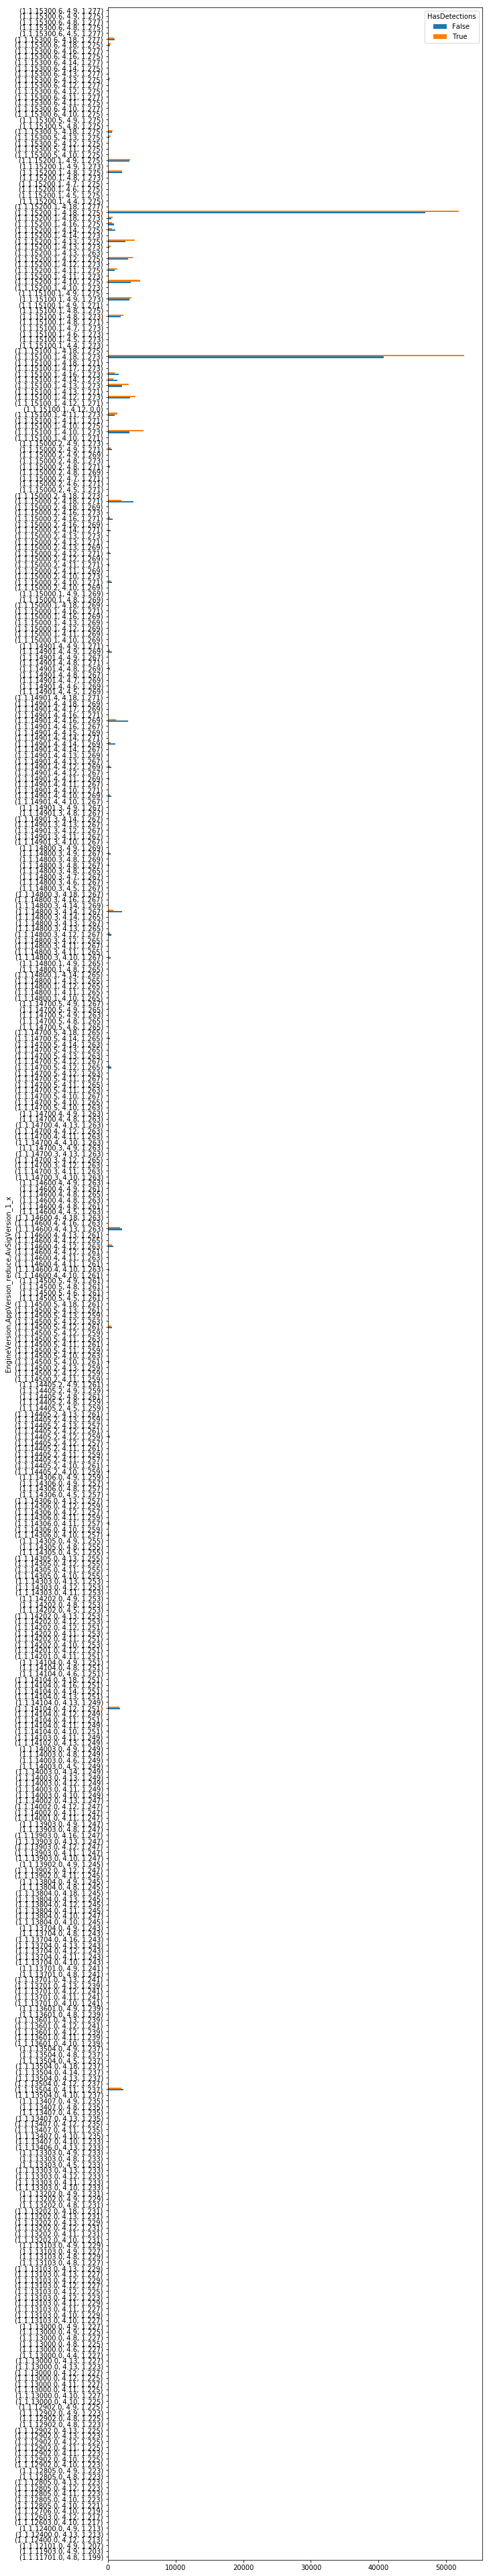

In [237]:
# get only the 4.X values
AppVersion_split = final["AppVersion"].str.rsplit(pat=".",expand=True)
final["AppVersion_reduce"] = AppVersion_split.loc[:,0]+"."+AppVersion_split.loc[:,1]#+"."+AppVersion_split.loc[:,2]

defenders = pd.crosstab(
    [
        final["EngineVersion"].fillna(1),
        final["AppVersion_reduce"].fillna(1),
        final["AvSigVersion_1_x"]
    ], 
    final.HasDetections.astype(bool)
)

defenders.plot(kind='barh',stacked=False, figsize = (10,70))

#### Antivirus and Firewall

Through domain knowledge we know firewall is important to prevent attacks.  In order to visualize if a Firewall is an important feature, we grouped the variable **Firewall** with **AVProductsEnabled** to determine its effectiveness.  The rate for each group is very similar.  This is because user behavior indicates more attacks are done by downloads versus straight attacks on the operating system.

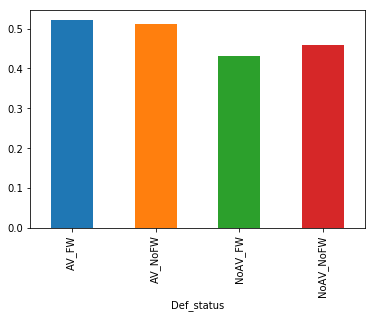

In [253]:
final['AVProductsEnabled'] = final['AVProductsEnabled'].astype(int)
final['av_status']=pd.cut(final.AVProductsEnabled,[-1,0,final.AVProductsEnabled.max()],2,labels=['NoAV','AV'])
final['fw_status']=pd.cut(final.Firewall,[-1,0,final.Firewall.max()],2,labels=['NoFW','FW'])

final['Def_status'] = final[['av_status', 'fw_status']].apply(lambda x: '_'.join(x), axis=1)

df_avfw=final[['Def_status','HasDetections']].copy()

df_grouped_avfw=df_avfw.groupby(by=['Def_status'])
detection_rate=df_grouped_avfw.HasDetections.sum()/df_grouped_avfw.HasDetections.count()
detection_rate.plot(kind='bar')

### New Features
One of the key data points that is absent in this dataset is the actual risk that an attacker would compromise the machine based on known vulnerabilities because simply taking a data set without understanding the vulnerabilities related to exposure, does not tell the entire story.  Without this data, the machine learning models will miss critical attributes of information in determining if malware could compromise the host.  While the Microsoft competition purpose is to determine if machines can be compromised, it is vital to understand the actual risk of the machine to determine if an attacker can actually deploy malware on a machine.  From an attacker standpoint, the methodology that is used to compromise a machine is to research whether a machine has vulnerabilities with tools like nMap or Nessus so they can launch the attack.  Attackers cannot deploy malware without exploiting vulnerabilities and only understanding the operating system levels, anti-virus dat versions, operating system configuration has no real context from an attacker standpoint to determine whether a machine can be compromised.

The first data element that is missing is the Common Vulnerabilities and Exposures (CVE) data to determine if the machine is vulnerable.  In order to gather this data, the OS build field will need to be compared to the Microsoft version number.  For example the Build number of 17763.253 matches to Version 1809 (e.g.__[Microsoft Build to Version Conversion](https://docs.Microsoft.com/en-us/windows/windows-10/release-information)__).  The second step is to find all the CVE's related with that version of Operating System. For example, version 1809 has 73+ related CVEs. (e.g.__[Microsoft Version to Listing of CVE Vulnerabilites](https://www.cvedetails.com/version-list/26/32238/1/Microsoft-Windows-10.html)__).  Once this data is obtained, the data can be aggregated by severity based on the CVE Score with the highest exploitable vulnerability as the rating.

In [6]:
# Include new features
ms_versions = pd.read_csv("data/vulnerabilities.csv")
final["os_build"] = final.Census_OSVersion.str.slice(5,10).astype(int)

final = pd.merge(final, ms_versions, on='os_build', how='left')

ms_versions[cols_cve].drop_duplicates()

version released_date  total_vulnerabilities   dos  code_execution  \
0      1903           NaN                    NaN   NaN             NaN   
3      1809      11/13/18                   74.0   2.0            23.0   
25     1803       4/30/18                  163.0   8.0            43.0   
29     1709      10/17/17                  265.0  18.0            52.0   
33     1703       4/11/17                  447.0  34.0            90.0   
36     1607        8/2/16                  568.0  45.0           118.0   
40     1511       8/15/15                  458.0  38.0            91.0   
41     1507       7/29/15                  514.0  33.0           121.0   

    overflow  memory_corruption  xss  bypass_something  gain_Information  \
0        NaN                NaN  NaN               NaN               NaN   
3       15.0                0.0  1.0               6.0              19.0   
25      23.0                2.0  1.0              19.0              36.0   
29      26.0                1.0  1.0              37.0              78.0   
33      35.0                3.0  0.0              45.0             159.0   
36      53.0                6.0  2.0              58.0             181.0   
40      36.0                9.0  1.0              39.0             155.0   
41      54.0                8.0  1.0              44.0             144.0   

    gain_privileges  
0               NaN  
3               0.0  
25              0.0  
29              0.0  
33              3.0  
36             58.0  
40             94.0  
41             84.0

The second data point that is missing is related to the Antivirus program. The "EngineVersion", "AppVersion", and "AVSigVersion" all need to be transformed related to how far they are out of date compared to the current date.  While attackers use vulnerabilities to deploy malware, is a system is out of date, the machine will have a higher degree of susceptibility.

The last data element that is missing is related to the firewall.  While under most circumstances’ firewalls are a good way at protecting a machine, the exploitability factors are not related to whether the firewall, inbound or outbound, is on or off, but the determination of what ports or services are open on the firewall external to the machine.  However, this data cannot be captured through an external data source because this is something local to the machine that would have had to be captured as part of the original dataset.

### Exceptional Work
<b>SUCCESS MEASURE</b> <i>You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.</i>

For the exceptional work bonus points, we believe that the subject matter expertise leveraged in the business understand in this report.  We performed additional research to actually understand the problem that Microsoft is facing in this Kaggle competition and presented the challenges of the cybersecurity maket and attack landscape in context to the entire industry and the problem that Microsoft is trying to solve.

The second piece of exceptional work in this report is related to the additional features that need to be captured to understand whether or not a machine is vulnerability from a security perspective.  Three key features  are missing which include total vulnerabilities,  Antivirus program aging, and open firewall ports and services.  All of these data elements  would tremendously help aid in the predication of whether the machine could be compromised with malware.  As part of our EDA, the team did bring in the data set that compared the OS and Patch version to vulnerabilities.  While this data is important for this stage in the project, we fully expect that this will help with our prediction in the future classes  

The thrid piece of exception work was data mining and munging the existing dataset. Since the data set contain over 300,000 rows and 82 variables, we spent a lot of time cleaning the data. We were able to delete columumns that had over 95% invalid data and munged the data in the columns that were missing data and inserted either median or mode data depending on whether is was numberical or catagorical. 